# Problem Statement-Time Series Forecasting

**For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.**</font>

In [1]:
# Import Neccessary packages
import os

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# For Bold printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#Importing Libraries
import numpy as np # Numerical libraries
import pandas as pd # to handle data in form of rows and columns

# For Visualisation-import ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
#importing seaborn for statistical plots
import seaborn as sns
# The following code is to set the subsequent figure sizes
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

# To calculate accuracy measures
from sklearn import metrics

### Dataset - Sparkling:

## Dataset Background:
* **Monthly Sales Data of 'Sparkling' Wine manufactured by ABC Estate Wines starting from Jan 1980 to July 1995 is provided.**
* **As an analyst in the ABC Estate Wines, the task is to analyse and forecast Wine Sales in the 20th century.**

## Data Dictionary of the Dataset:
* **The dataset 'Sparkling' contain two columns of data:**
* **The monthly time stamp from Jan 1980 to July 1995 and the sales corresponding to the wines.** 

## Loading the Dataset as Time Series data:

### 1.1 Read the data as an appropriate Time Series data and plot the data.

### Method-1

In [2]:
# Read the Sparkling Dataset
df_spark = pd.read_csv('Sparkling.csv')
df_spark.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

**Create Time Stamps and adding it to the data frame to make it a Time Series Data**

In [3]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [4]:
# Adding the time stamp to the data frame
df_spark['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_spark.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [5]:
# Set Time_Stamp as an index
df_spark.set_index('Time_Stamp',inplace=True)
df_spark.drop(['YearMonth'], axis=1, inplace=True)
df_spark.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

### Method-2

In [6]:
## Alternate way of reading the data as time series.
## Squeese = True will return the index col as series
spark = pd.read_csv('Sparkling.csv',parse_dates=True,squeeze=True,index_col=0)
printmd('**View the top 5 rows of Sparkling dataset :**')
spark.head()

**View the top 5 rows of Sparkling dataset :**

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64

In [7]:
printmd('**View the bottom 5 rows of Sparkling dataset :**')
spark.tail()

**View the bottom 5 rows of Sparkling dataset :**

YearMonth
1995-03-01    1897
1995-04-01    1862
1995-05-01    1670
1995-06-01    1688
1995-07-01    2031
Name: Sparkling, dtype: int64

## Inferences:
* **All values are properly loaded for the dataset with the index as pandas datetime format.**
* **The 'Sparkling' Time series has values in float64 datatype format.**

## Checking for Null values:
**As it is a Time Series data, handling Null values is of utmost importance. The null values cannot be dropped as the Time seriies data need to contiguous, so they need to be properly imputed.**

In [8]:
printmd('**The number of Null values in Sparkling dataset:**')
print(spark.isnull().sum())

**The number of Null values in Sparkling dataset:**

0


## Inferences:
**There are No Null values present in Sparkling dataset.**

## Plotting the Sparkling Time Series to understand the behaviour of the data.:

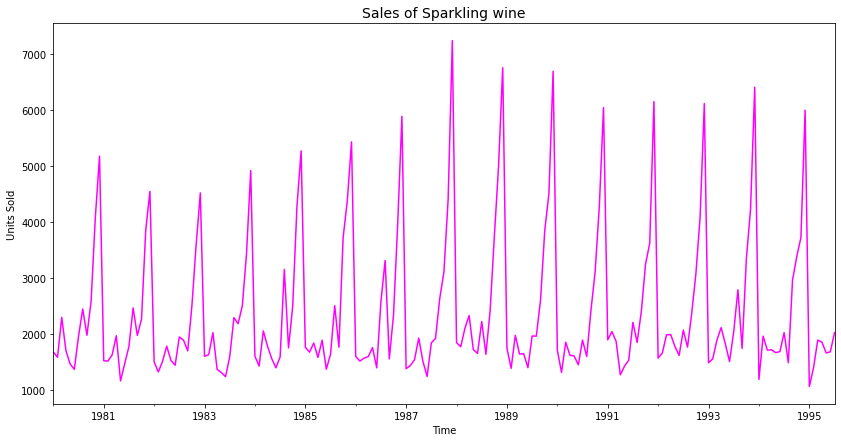

In [9]:
spark.plot(color='magenta') 
plt.title('Sales of Sparkling wine', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')
plt.show()

# 1.2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

## Check the basic measures of descriptive statistics:

In [10]:
printmd('**Data Description for Sparkling Dataset:**')
spark.describe()

**Data Description for Sparkling Dataset:**

count     187.000000
mean     2402.417112
std      1295.111540
min      1070.000000
25%      1605.000000
50%      1874.000000
75%      2549.000000
max      7242.000000
Name: Sparkling, dtype: float64

**The basic measures of descriptive statistics tell us how the Sales have varied across years. But for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.**

## Plot a boxplot to understand the spread of sales across different years and within different months across years.

### Yearly Boxplot 

**Yearly Boxplot for Sparkling Dataset:**

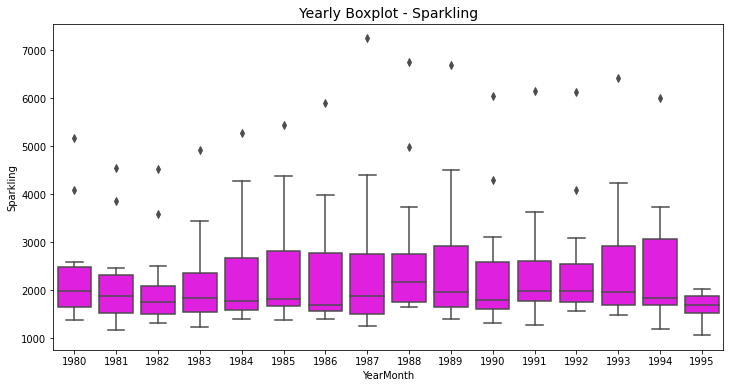

In [11]:
printmd('**Yearly Boxplot for Sparkling Dataset:**')
plt.figure(figsize = (12, 6))
sns.boxplot(x = spark.index.year,y = spark, color = 'magenta')
plt.title('Yearly Boxplot - Sparkling', fontsize=14)
plt.show()

### Monthly Plot - Sparkling

**Monthly Boxplot for all the years for Sparkling Dataset:**

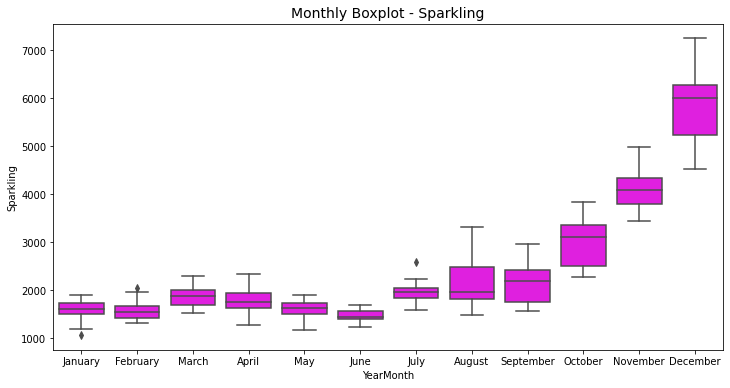

In [12]:
printmd('**Monthly Boxplot for all the years for Sparkling Dataset:**')
plt.figure(figsize = (12, 6))
sns.boxplot(x = spark.index.month_name(),y = spark, color='magenta')
plt.title('Monthly Boxplot - Sparkling', fontsize=14)
plt.show()

## Plot a time series monthplot to understand the spread of sales across different years and within different months across years.

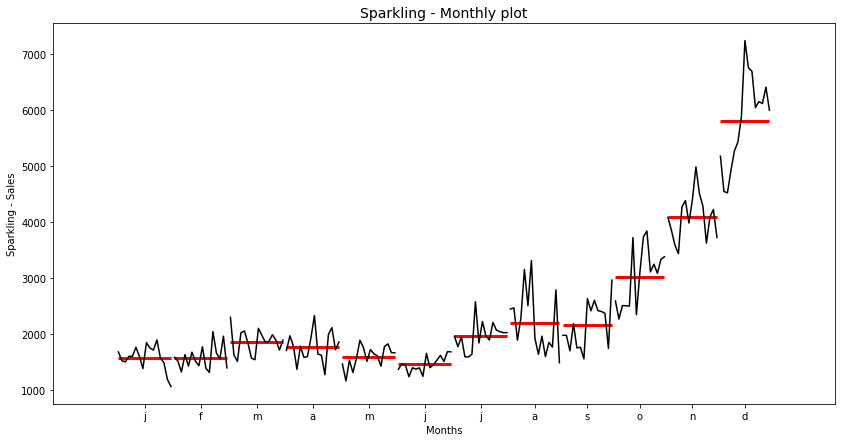

In [13]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(spark,ylabel='Sparkling - Sales')
plt.xlabel('Months')
plt.title('Sparkling - Monthly plot', fontsize = 14)
plt.show()

**This plot shows us the behaviour of the Time Series  across various months. The red line is the median value.**

## Plot graph of monthly Wine sales across years:

In [14]:
monthly_sales_across_years_spark = pd.pivot_table(pd.DataFrame(spark), columns = spark.index.month, 
                                                      index = spark.index.year)
monthly_sales_across_years_spark

Sparkling                                                          \
YearMonth        1       2       3       4       5       6       7       8    
YearMonth                                                                     
1980         1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981         1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982         1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983         1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984         1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985         1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986         1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987         1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988         1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989         1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990         1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991         1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992         1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993         1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994         1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995         1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

                                           
YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

**Monthly Wine sales across years for Sparkling:**

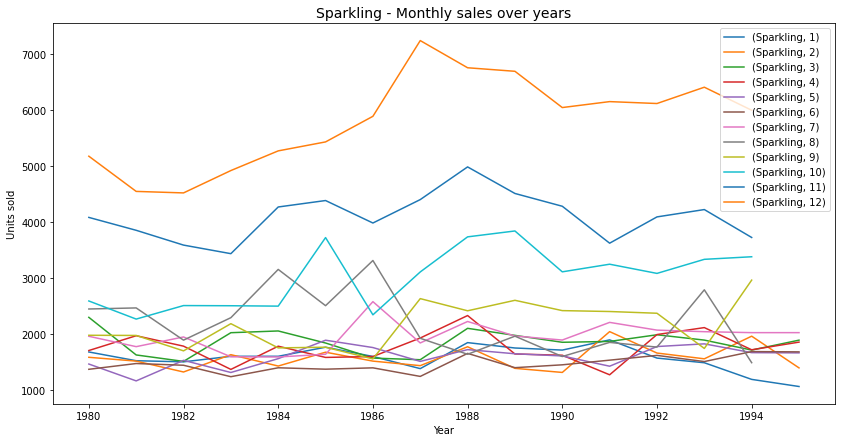

In [15]:
printmd('**Monthly Wine sales across years for Sparkling:**')
monthly_sales_across_years_spark.plot()
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Year')
plt.title('Sparkling - Monthly sales over years', fontsize=14)
plt.show()

## Plot the average sales per month and the month on month percentage change of sales.

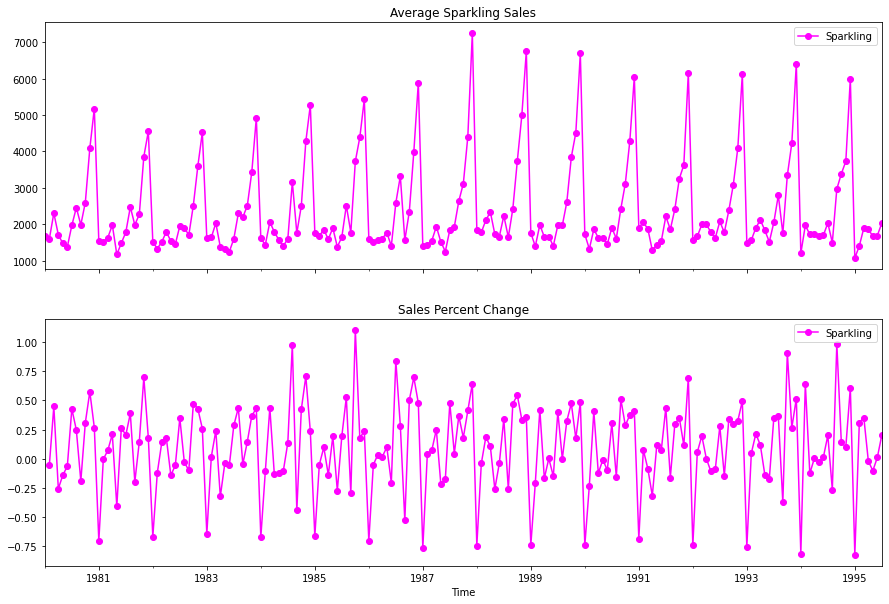

In [16]:
# group by date and get average Sparkling sales and precent change
average_spark    = spark.groupby(spark.index).mean()
pct_change_spark = spark.groupby(spark.index).sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,10))
# plot average Sparkling sales over time(year-month)
ax1 = average_spark.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales", color = 'magenta')
# plot precent change for Sales over time(year-month)
ax2 = pct_change_spark.plot(legend=True,ax=axis2,marker='o',color='magenta',title="Sales Percent Change")
plt.xlabel('Time')
plt.legend(loc='best')
plt.show()

## Decompose the Time Series and plot the different components.

**If the seasonality and residual components are independent of the trend, then you have an additive series. If the seasonality and residual components are in fact dependent, meaning they fluctuate on trend, then you have a multiplicative series.**

In [17]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

**Decomposition of Sparkling Time Series with additive Seasonality:**

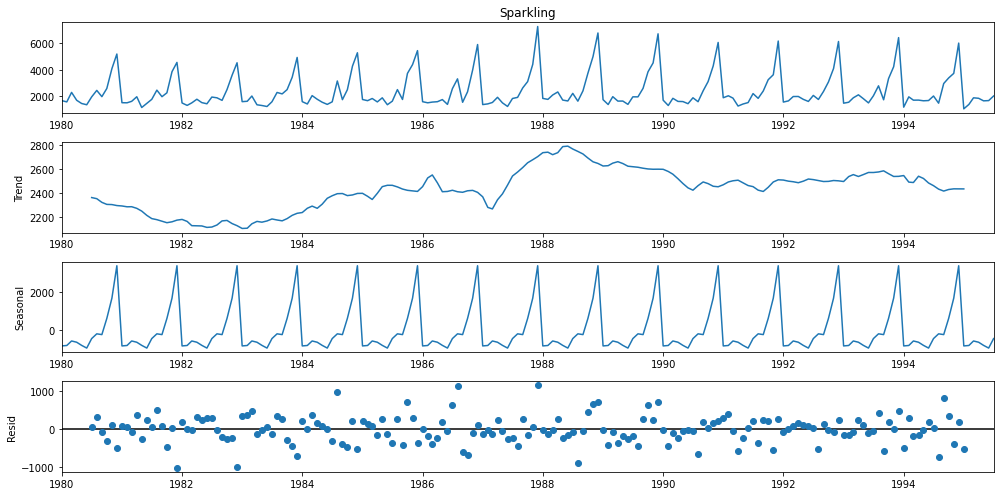

In [18]:
printmd('**Decomposition of Sparkling Time Series with additive Seasonality:**')
decomposition_add = seasonal_decompose(spark,model='additive')
decomposition_add.plot();

**Decomposition of Sparkling Time Series with multiplicative Seasonality:**

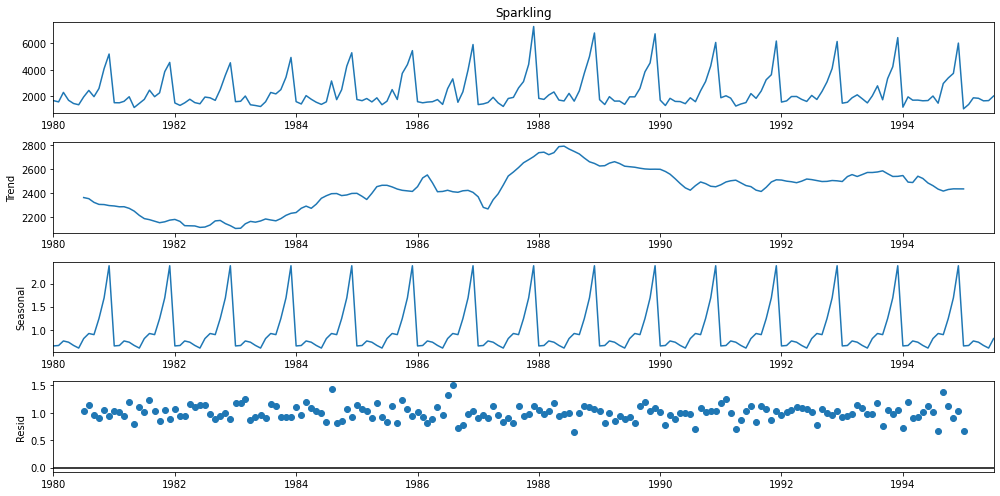

In [19]:
printmd('**Decomposition of Sparkling Time Series with multiplicative Seasonality:**')
decomposition_mul = seasonal_decompose(spark,model='multiplicative')
decomposition_mul.plot();

# 1.3 Split the data into training and test. The test data should start in 1991.

In [20]:
spark = pd.DataFrame(spark)
train_spark = spark[spark.index.year < 1991]
test_spark = spark[spark.index.year >= 1991]

In [21]:
print('Length of Train Data:', len(train_spark))
print('Length of Test Data:', len(test_spark))

Length of Train Data: 132
Length of Test Data: 55


In [22]:
print('First few rows of Training Data:','\n',train_spark.head(),'\n')
print('Last few rows of Training Data:','\n',train_spark.tail(),'\n')
print('First few rows of Test Data:','\n',test_spark.head(),'\n')
print('Last few rows of Test Data:','\n',test_spark.tail(),'\n')

First few rows of Training Data: 
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471 

Last few rows of Training Data: 
             Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047 

First few rows of Test Data: 
             Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432 

Last few rows of Test Data: 
             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031 



In [23]:
print(train_spark.shape)
print(test_spark.shape)

(132, 1)
(55, 1)


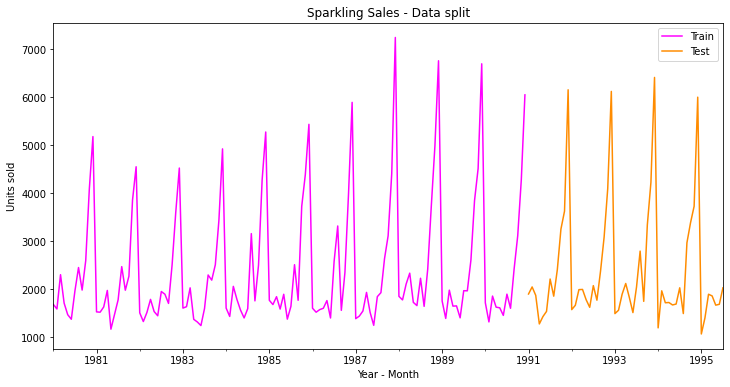

In [24]:
plt.figure(figsize = (12, 6))
train_spark['Sparkling'].plot(label = 'Train',color='magenta')
test_spark['Sparkling'].plot(label = 'Test',color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling Sales - Data split', fontsize = 12)
plt.show();

# 1.4 Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression, naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.


# Model 1: Linear Regression

In [25]:
train_time = [i+1 for i in range(len(train_spark))]
test_time = [i+133 for i in range(len(test_spark))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


**We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.**

In [26]:
LinearRegression_train_spark = train_spark.copy()
LinearRegression_test_spark = test_spark.copy()

In [27]:
LinearRegression_train_spark['time'] = train_time
LinearRegression_test_spark['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train_spark.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train_spark.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test_spark.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test_spark.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



**Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.**

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train_spark[['time']],LinearRegression_train_spark['Sparkling'].values)

LinearRegression()

In [29]:
LinearRegression_train_spark['RegOnTime_spark'] = lr.predict(LinearRegression_train_spark[['time']])
LinearRegression_test_spark['RegOnTime_spark'] = lr.predict(LinearRegression_test_spark[['time']])

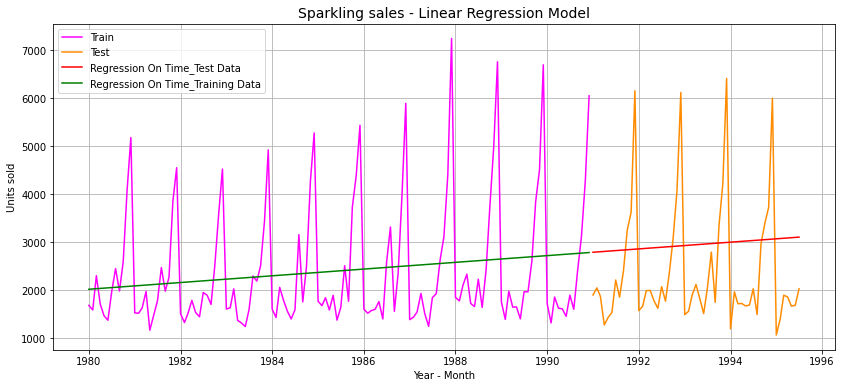

In [30]:
plt.figure(figsize=(14,6))
plt.plot( train_spark['Sparkling'], label='Train',color = 'magenta')
plt.plot(test_spark['Sparkling'], label='Test',color = 'darkorange')
plt.plot(LinearRegression_test_spark['RegOnTime_spark'], label='Regression On Time_Test Data',color = 'red')
plt.plot(LinearRegression_train_spark['RegOnTime_spark'], label='Regression On Time_Training Data',color = 'green')
plt.title('Sparkling sales - Linear Regression Model', fontsize = 14)
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.grid();

### Model Evaluation

In [31]:
rmse_reg = metrics.mean_squared_error(test_spark['Sparkling'],LinearRegression_test_spark['RegOnTime_spark'],squared=False)
print("For Regression On Time forecast on the Test Data, RMSE is %3.3f " %(rmse_reg))

For Regression On Time forecast on the Test Data, RMSE is 1389.135 


In [32]:
spark_resultsDf = pd.DataFrame({'Test RMSE': [rmse_reg]},index=['RegressionOnTime'])
spark_resultsDf

Test RMSE
RegressionOnTime  1389.135175

# Model 2: Naive forecast

In [33]:
NaiveModel_train = train_spark.copy()
NaiveModel_test = test_spark.copy()

In [34]:
NaiveModel_train['spark_naive'] = np.asarray(train_spark['Sparkling'])[len(np.asarray(train_spark['Sparkling']))-1]
NaiveModel_train['spark_naive'].head()

YearMonth
1980-01-01    6047
1980-02-01    6047
1980-03-01    6047
1980-04-01    6047
1980-05-01    6047
Name: spark_naive, dtype: int64

In [35]:
NaiveModel_test['spark_naive'] = np.asarray(train_spark['Sparkling'])[len(np.asarray(train_spark['Sparkling']))-1]
NaiveModel_test['spark_naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: spark_naive, dtype: int64

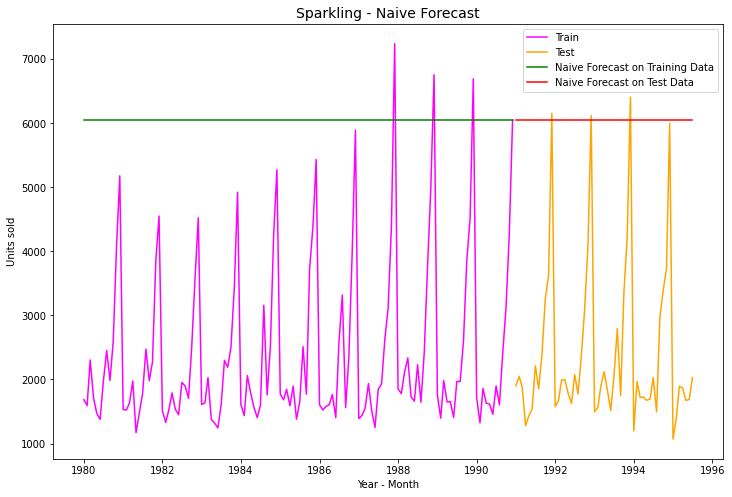

In [36]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(test_spark['Sparkling'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['spark_naive'], label='Naive Forecast on Training Data', color = 'green')
plt.plot(NaiveModel_test['spark_naive'], label='Naive Forecast on Test Data', color = 'red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - Naive Forecast", fontsize = 14)
plt.show();

In [37]:
rmse_naive = metrics.mean_squared_error(test_spark['Sparkling'],NaiveModel_test['spark_naive'],squared=False)
print("For Naive forecast on the Test Data, RMSE is %3.3f " %(rmse_naive))

For Naive forecast on the Test Data, RMSE is 3864.279 


In [38]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_naive]},index=['NaiveModel'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_2])
spark_resultsDf

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

## Model 3: Simple Average

In [39]:
SimpleAverage_train = train_spark.copy()
SimpleAverage_test = test_spark.copy()

In [40]:
SimpleAverage_train['spark_mean_forecast'] = train_spark['Sparkling'].mean()
SimpleAverage_train['spark_mean_forecast'].head()

YearMonth
1980-01-01    2403.780303
1980-02-01    2403.780303
1980-03-01    2403.780303
1980-04-01    2403.780303
1980-05-01    2403.780303
Name: spark_mean_forecast, dtype: float64

In [41]:
SimpleAverage_test['spark_mean_forecast'] = train_spark['Sparkling'].mean()
SimpleAverage_test['spark_mean_forecast'].head()

YearMonth
1991-01-01    2403.780303
1991-02-01    2403.780303
1991-03-01    2403.780303
1991-04-01    2403.780303
1991-05-01    2403.780303
Name: spark_mean_forecast, dtype: float64

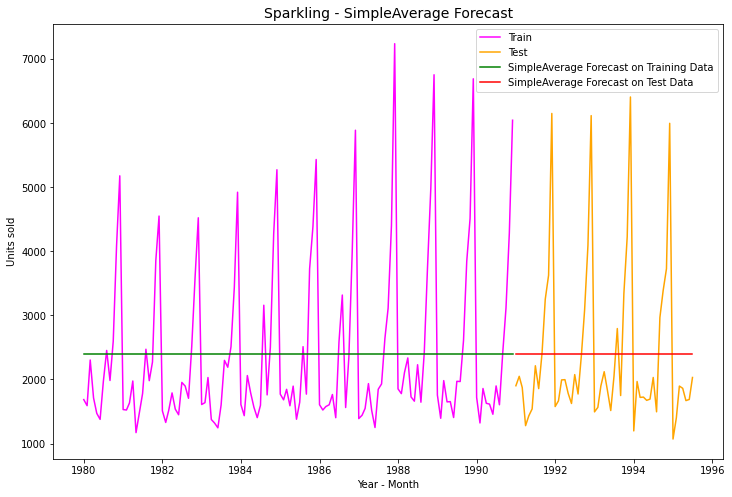

In [42]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(test_spark['Sparkling'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['spark_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'green')
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - SimpleAverage Forecast", fontsize=14)
plt.show()

### Model Evaluation

In [43]:
rmse_simple_avg = metrics.mean_squared_error(test_spark['Sparkling'],SimpleAverage_test['spark_mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data, RMSE is %3.3f " %(rmse_simple_avg))

For Simple Average forecast on the Test Data, RMSE is 1275.082 


In [44]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_simple_avg]},index=['SimpleAverage'])
spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_3])
spark_resultsDf

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352
SimpleAverage     1275.081804

## Model 4: Moving Average

In [45]:
MovingAverage = spark.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [46]:
MovingAverage['Spark_Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Spark_Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Spark_Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Spark_Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Spark_Trailing_2  Spark_Trailing_4  Spark_Trailing_6  \
YearMonth                                                                     
1980-01-01       1686               NaN               NaN               NaN   
1980-02-01       1591            1638.5               NaN               NaN   
1980-03-01       2304            1947.5               NaN               NaN   
1980-04-01       1712            2008.0           1823.25               NaN   
1980-05-01       1471            1591.5           1769.50               NaN   

            Spark_Trailing_9  
YearMonth                     
1980-01-01               NaN  
1980-02-01               NaN  
1980-03-01               NaN  
1980-04-01               NaN  
1980-05-01               NaN

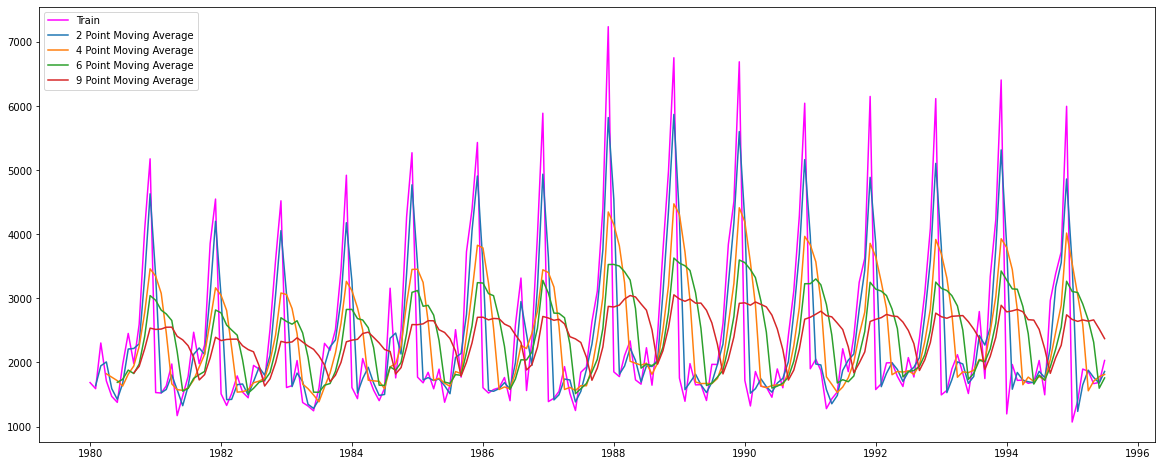

In [47]:
plt.figure(figsize=(20,8))
plt.plot(MovingAverage['Sparkling'], label='Train', color='magenta')
plt.plot(MovingAverage['Spark_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best');

In [48]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

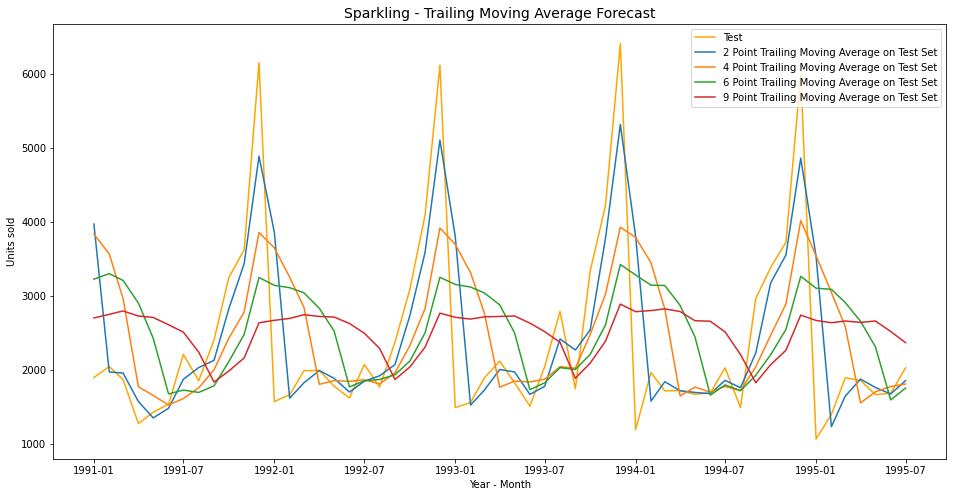

In [49]:
## Plotting on Test data

plt.figure(figsize=(16,8))
# plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test', color = 'orange')

plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Sparkling - Trailing Moving Average Forecast", fontsize=14);

In [50]:
## Test Data - rmse_spark --> 2 point Spark_Trailing MA

rmse_spark_MovingAverage_2 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  rmse_spark is %3.3f " %(rmse_spark_MovingAverage_2))

## Test Data - rmse_spark --> 4 point Spark_Trailing MA

rmse_spark_MovingAverage_4 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  rmse_spark is %3.3f" %(rmse_spark_MovingAverage_4))

## Test Data - rmse_spark --> 6 point Spark_Trailing MA

rmse_spark_MovingAverage_6 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  rmse_spark is %3.3f" %(rmse_spark_MovingAverage_6))

## Test Data - rmse_spark --> 9 point Spark_Trailing MA

rmse_spark_MovingAverage_9 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  rmse_spark is %3.3f" %(rmse_spark_MovingAverage_9))

For 2 point Moving Average Model forecast on the Test Data,  rmse_spark is 813.401 
For 4 point Moving Average Model forecast on the Test Data,  rmse_spark is 1156.590
For 6 point Moving Average Model forecast on the Test Data,  rmse_spark is 1283.927
For 9 point Moving Average Model forecast on the Test Data,  rmse_spark is 1346.278


In [51]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_spark_MovingAverage_2,rmse_spark_MovingAverage_4
                                          ,rmse_spark_MovingAverage_6,rmse_spark_MovingAverage_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_4])
spark_resultsDf

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352
SimpleAverage     1275.081804
2 point TMA        813.400684
4 point TMA       1156.589694
6 point TMA       1283.927428
9 point TMA       1346.278315

## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

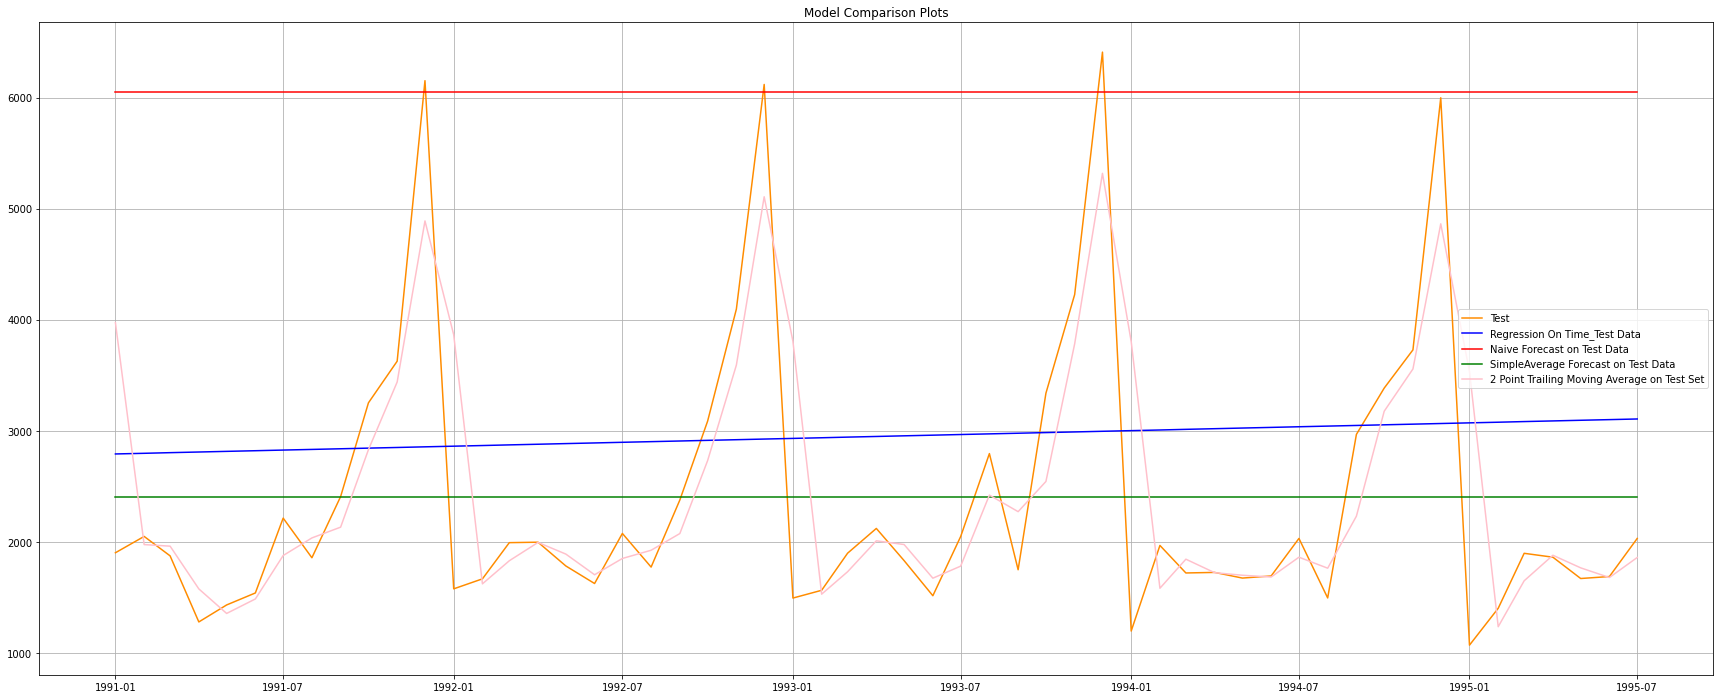

In [52]:
## Plotting on Test data

plt.figure(figsize=(30,12))
# plt.plot(train_spark['Sparkling'], label='Train',color='magenta')
plt.plot(test_spark['Sparkling'], label='Test',color='darkorange')

plt.plot(LinearRegression_test_spark['RegOnTime_spark'], label='Regression On Time_Test Data',color='blue')

plt.plot(NaiveModel_test['spark_naive'], label='Naive Forecast on Test Data',color='red')

plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SimpleAverage Forecast on Test Data',color='green')

plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Test Set',color='pink')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Model 5: Simple Exponential Smoothing

In [53]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [54]:
SES_train = train_spark.copy()
SES_test = test_spark.copy()

In [55]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


## Auto fit Model:

In [56]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [57]:
printmd('**The output parameters for optimized model are:**')
model_SES_autofit.params

**The output parameters for optimized model are:**

{'smoothing_level': 0.04960659880745982,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435374,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [58]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_spark['Sparkling']))
printmd('**Viewing the first five Predictions for Test Data:**')
SES_test.head()

**Viewing the first five Predictions for Test Data:**

Sparkling      predict
YearMonth                         
1991-01-01       1902  2724.929339
1991-02-01       2049  2724.929339
1991-03-01       1874  2724.929339
1991-04-01       1279  2724.929339
1991-05-01       1432  2724.929339

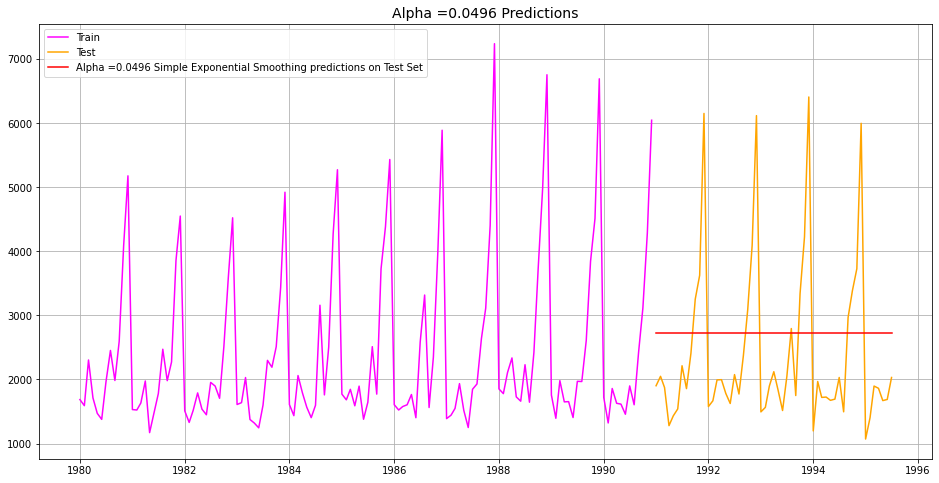

In [59]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train',color = 'magenta')
plt.plot(SES_test['Sparkling'], label='Test',color = 'orange')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set',color = 'red')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0496 Predictions',fontsize = 14);

### Model Evaluation for $\alpha$ = 0.0496 : Simple Exponential Smoothing

In [60]:
## Test Data

rmse_SES = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SES))

For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [61]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_SES]}
                           ,index=['Alpha=0.0496, SES Optimized'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_5])
spark_resultsDf

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverage                1275.081804
2 point TMA                   813.400684
4 point TMA                  1156.589694
6 point TMA                  1283.927428
9 point TMA                  1346.278315
Alpha=0.0496, SES Optimized  1316.034674

## Iterative Method for Simple Exponential Smoothing
- Here we will set different alpha values.

In [62]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [63]:
alpha_list = [0.025,0.05,0.25, 0.1, 0.2, 0.3, 0.5, 0.99]
for i in alpha_list:
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(test_spark['Sparkling']))
    
    rmse_SES_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_SES_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i 
                                      ,'Test RMSE':rmse_SES_test_i}, ignore_index=True)

## Model Evaluation based on Iterations:

In [64]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values   Train RMSE    Test RMSE
0         0.025  1322.084340  1286.248846
1         0.050  1318.429335  1316.411742
3         0.100  1333.873836  1375.393398
4         0.200  1356.042987  1595.206839
2         0.250  1359.701408  1755.488175

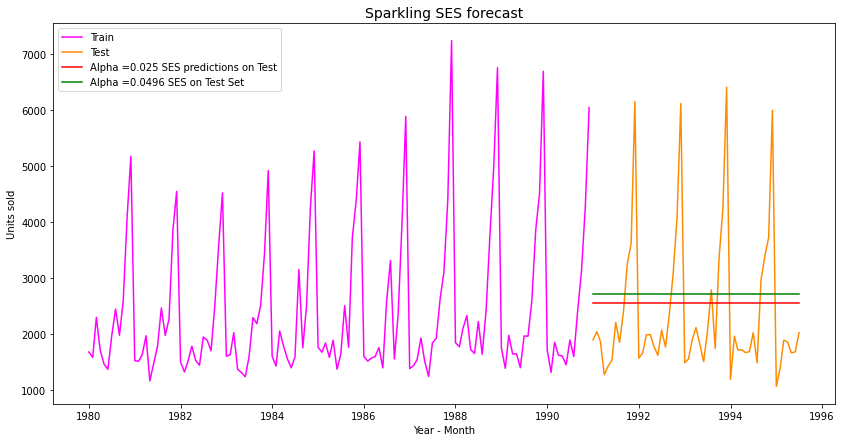

In [65]:
#plt.figure(figsize=(10,5))
plt.plot(SES_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(SES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SES_test['predict', 0.025], color = 'red', label='Alpha =0.025 SES predictions on Test')
plt.plot(SES_test['predict'], label='Alpha =0.0496 SES on Test Set',color = 'green')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling SES forecast', fontsize=14)
plt.legend(loc='best');

In [66]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.025,SES iterative'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_6_1])
spark_resultsDf

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverage                1275.081804
2 point TMA                   813.400684
4 point TMA                  1156.589694
6 point TMA                  1283.927428
9 point TMA                  1346.278315
Alpha=0.0496, SES Optimized  1316.034674
Alpha=0.025,SES iterative    1286.248846

## Model 6: Double Exponential Smoothing (Holt's Model)

In [67]:
DES_train = train_spark.copy()
DES_test = test_spark.copy()

In [68]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


## Auto fit Model:

In [69]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [70]:
printmd('**The output parameters for optimized model are:**')
model_DES_autofit.params

**The output parameters for optimized model are:**

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [71]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_trend']
print(alpha)
print(beta)

0.6885714285714285
9.999999999999999e-05


In [72]:
DES_test['predict_spark',alpha,beta] = model_DES_autofit.forecast(len(test_spark['Sparkling']))
printmd('**Viewing the first five Predictions for Test Data:**')
DES_test.head()

**Viewing the first five Predictions for Test Data:**

Sparkling  \
YearMonth               
1991-01-01       1902   
1991-02-01       2049   
1991-03-01       1874   
1991-04-01       1279   
1991-05-01       1432   

            (predict_spark, 0.6885714285714285, 9.999999999999999e-05)  
YearMonth                                                               
1991-01-01                                        5221.278699           
1991-02-01                                        5127.886554           
1991-03-01                                        5034.494409           
1991-04-01                                        4941.102264           
1991-05-01                                        4847.710119

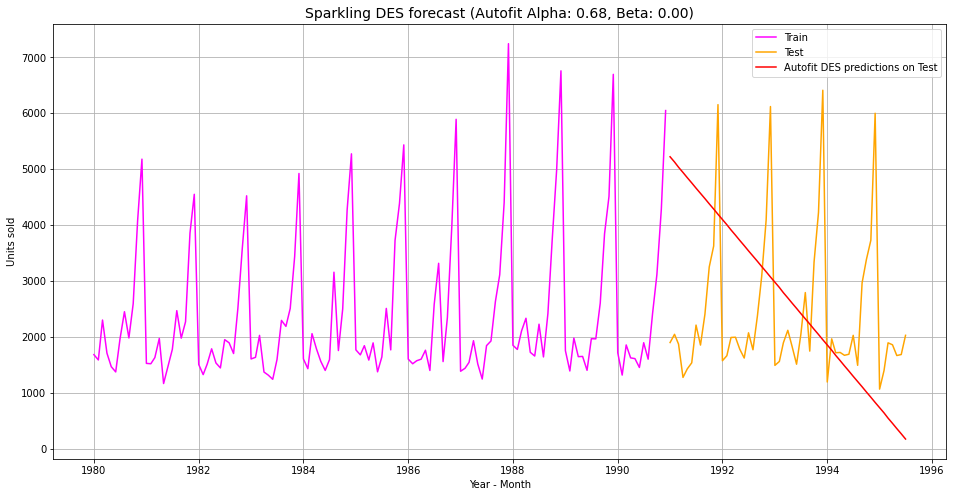

In [73]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Sparkling'], label='Train',color = 'magenta')
plt.plot(DES_test['Sparkling'], label='Test',color = 'orange')

plt.plot(DES_test['predict_spark',alpha,beta], color = 'red', label='Autofit DES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast (Autofit Alpha: 0.68, Beta: 0.00)', fontsize=14)
plt.legend(loc='best')
plt.grid();

### Model Evaluation for $\alpha$ = 0.68 and $\beta$ = 0.0 : DES-Autofit Model:

In [74]:
## Test Data

rmse_DES = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict_spark',alpha,beta],squared=False)
print("For Auto-fit Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_DES))

For Auto-fit Double Exponential Smoothing Model forecast on the Test Data, RMSE is 2007.239


In [75]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_DES]}
                           ,index=['Alpha=0.68,Beta=0.0, DES Optimized'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_7])
spark_resultsDf

Test RMSE
RegressionOnTime                    1389.135175
NaiveModel                          3864.279352
SimpleAverage                       1275.081804
2 point TMA                          813.400684
4 point TMA                         1156.589694
6 point TMA                         1283.927428
9 point TMA                         1346.278315
Alpha=0.0496, SES Optimized         1316.034674
Alpha=0.025,SES iterative           1286.248846
Alpha=0.68,Beta=0.0, DES Optimized  2007.238526

## Iterative Method for Double Exponential Smoothing
- Here we will set different alpha values.

In [76]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [77]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test_spark['Sparkling']))
        
        rmse_DES_train = np.round(metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False),2)
        
        rmse_DES_test = np.round(metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False),2)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
                                          ,'Test RMSE':rmse_DES_test}, ignore_index=True)

## Model Evaluation based on Iterations:

In [78]:
resultsDf_7.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1     1382.52    1778.56
1            0.1          0.2     1413.60    2599.44
10           0.2          0.1     1418.04    3611.76
2            0.1          0.3     1445.76    4293.08
20           0.3          0.1     1431.17    5908.19

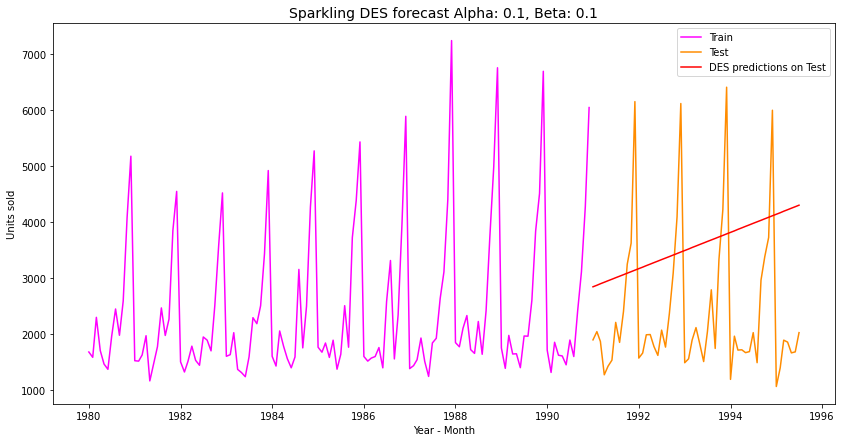

In [79]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(DES_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(DES_test['predict', 0.1, 0.1], color = 'red', label='DES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling DES forecast Alpha: 0.1, Beta: 0.1', fontsize=14)
plt.legend(loc='best');

In [80]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DES iterative'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_7_1])
spark_resultsDf

Test RMSE
RegressionOnTime                    1389.135175
NaiveModel                          3864.279352
SimpleAverage                       1275.081804
2 point TMA                          813.400684
4 point TMA                         1156.589694
6 point TMA                         1283.927428
9 point TMA                         1346.278315
Alpha=0.0496, SES Optimized         1316.034674
Alpha=0.025,SES iterative           1286.248846
Alpha=0.68,Beta=0.0, DES Optimized  2007.238526
Alpha=0.1,Beta=0.1,DES iterative    1778.560000

## Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [81]:
TES_train = train_spark.copy()
TES_test = test_spark.copy()

In [82]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')

C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


## Auto fit Model:

In [83]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [84]:
printmd('**The output parameters for optimized model are:**')
model_TES_autofit.params

**The output parameters for optimized model are:**

{'smoothing_level': 0.11107308290744182,
 'smoothing_trend': 0.06167745801641925,
 'smoothing_seasonal': 0.39488777704116057,
 'damping_trend': nan,
 'initial_level': 1639.5306320456996,
 'initial_trend': -13.803739314239138,
 'initial_seasons': array([1.04411064, 1.00095858, 1.40459398, 1.20906039, 0.96413947,
        0.96754964, 1.3048211 , 1.69841076, 1.37034155, 1.81659752,
        2.84708154, 3.62462473]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [85]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
print(alpha)
print(beta)
print(gamma)

0.11107308290744182
0.06167745801641925
0.39488777704116057


In [86]:
TES_test['predict',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test_spark['Sparkling']))

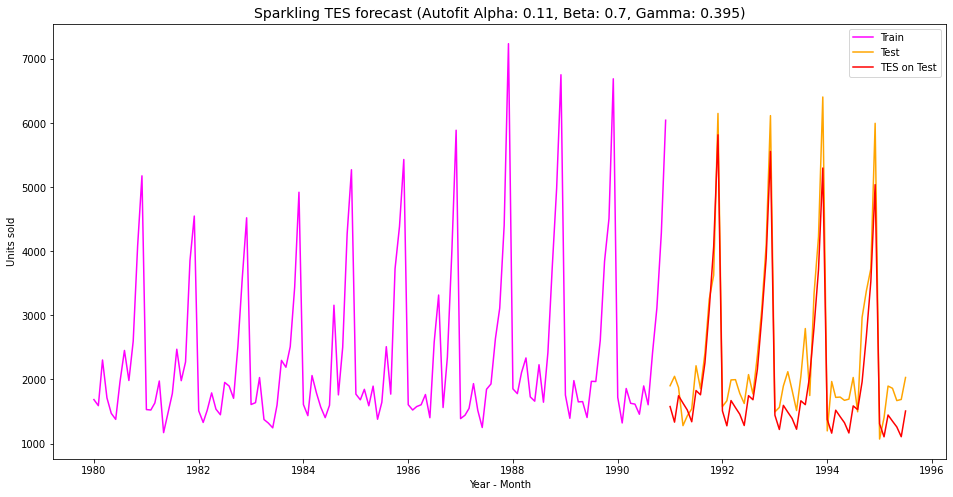

In [87]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(TES_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(TES_test['Sparkling'], label='Test', color = 'orange')

plt.plot(TES_test['predict',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Autofit Alpha: 0.11, Beta: 0.7, Gamma: 0.395)', fontsize=14)

plt.legend(loc='best');

### Model Evaluation for $\alpha$ = 0.11 and $\beta$ = 0.7$\beta$ = 0.395 : TES-Autofit Model:

In [88]:
## Test Data

rmse_TES = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',alpha,beta,gamma],squared=False)
print("For Auto-fit Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_TES))

For Auto-fit Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 469.432


In [89]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_TES]}
                           ,index=['Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8])
spark_resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverage                                  1275.081804
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
6 point TMA                                    1283.927428
9 point TMA                                    1346.278315
Alpha=0.0496, SES Optimized                    1316.034674
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   469.432003

## Iterative Method for Triple Exponential Smoothing
- Here we will set different alpha values.

In [90]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [91]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test_spark['Sparkling']))
        
            rmse_TES_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_TES_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8 = resultsDf_8.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_TES_train,'Test RMSE':rmse_TES_test}
                                                 , ignore_index=True)

## Model Evaluation based on Iterations:

In [92]:
resultsDf_8.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values  Beta Values  Train RMSE   Test RMSE  Gamma Values
240           0.4          0.1  387.990141  371.367690           0.3
321           0.5          0.1  409.863151  379.651522           0.4
320           0.5          0.1  401.756285  379.852675           0.3
64            0.1          0.9  435.461755  392.102406           0.3
176           0.3          0.3  404.513320  392.786198           0.3

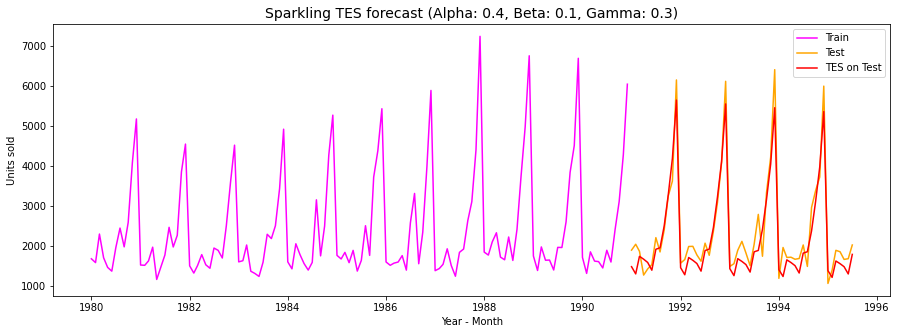

In [93]:
plt.figure(figsize=(15,5))
plt.plot(TES_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(TES_test['Sparkling'], label='Test', color = 'orange')

plt.plot(TES_test['predict', 0.4, 0.1, 0.3], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling TES forecast (Alpha: 0.4, Beta: 0.1, Gamma: 0.3)', fontsize=14)

plt.legend(loc='best');

In [94]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [resultsDf_8.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                           ,index=['Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_8_1])
spark_resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverage                                  1275.081804
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
6 point TMA                                    1283.927428
9 point TMA                                    1346.278315
Alpha=0.0496, SES Optimized                    1316.034674
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   469.432003
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690

In [95]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   469.432003
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
SimpleAverage                                  1275.081804
6 point TMA                                    1283.927428
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.0496, SES Optimized                    1316.034674
9 point TMA                                    1346.278315
RegressionOnTime                               1389.135175
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
NaiveModel                                     3864.279352

# Plot all above models

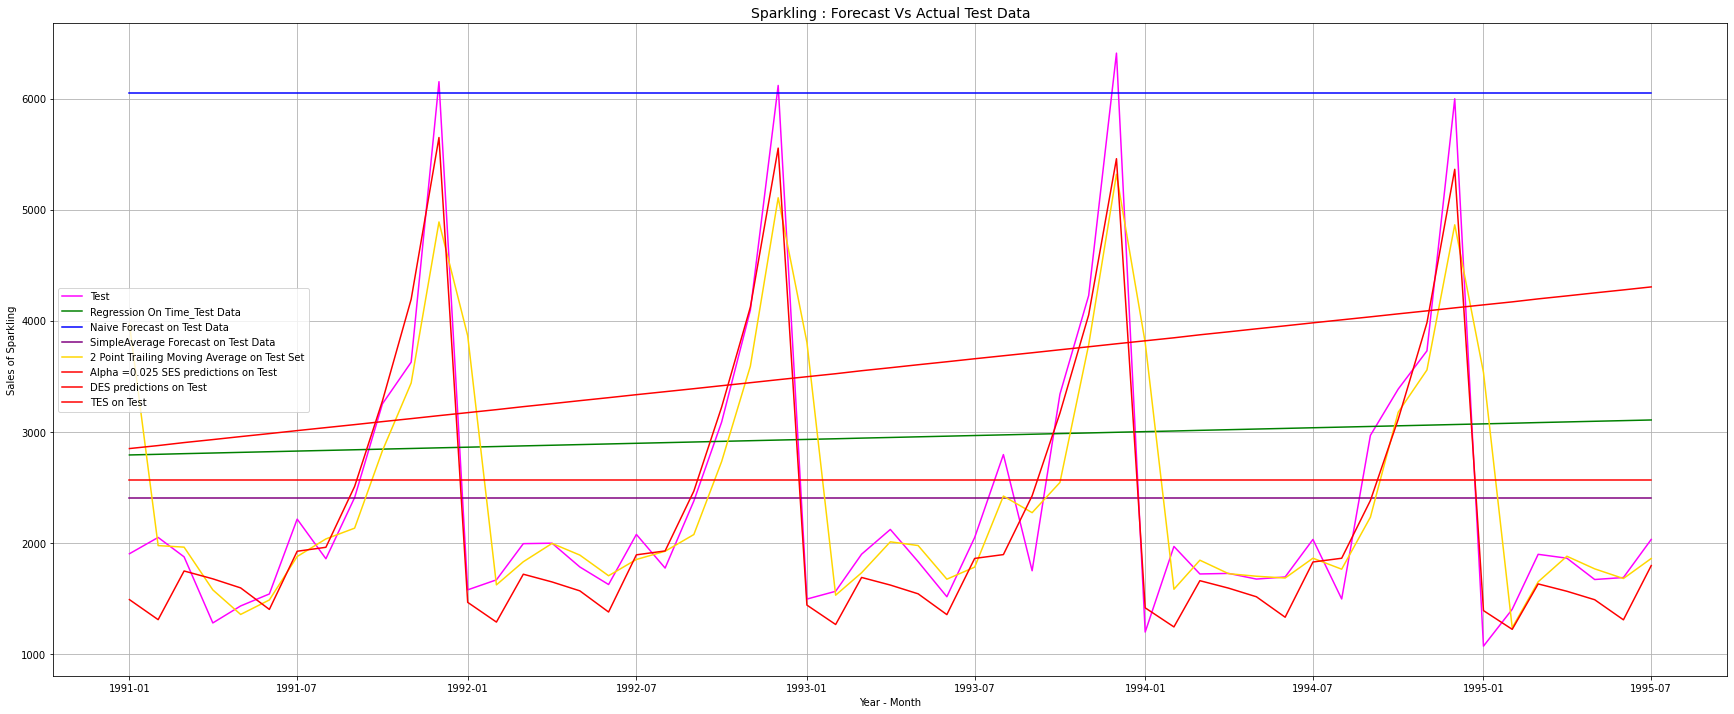

In [96]:
## Plotting on Test data

plt.figure(figsize=(30,12))
#Train Data
# plt.plot(train_spark['Sparkling'], label='Train',color='magenta')
#Test Data
plt.plot(test_spark['Sparkling'], label='Test',color='magenta')
#Linear Regression
plt.plot(LinearRegression_test_spark['RegOnTime_spark'], label='Regression On Time_Test Data',color='green')
#Naive Forecast
plt.plot(NaiveModel_test['spark_naive'], label='Naive Forecast on Test Data',color='blue')
#Simple Average
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SimpleAverage Forecast on Test Data',color='purple')
#2-point trailing moving average
plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Test Set',color='gold')
#SES itervative at alpha=0.025
plt.plot(SES_test['predict', 0.025], color = 'red', label='Alpha =0.025 SES predictions on Test')
#DES iterative at alpha=0.1 and beta=0.1
plt.plot(DES_test['predict', 0.1, 0.1], color = 'red', label='DES predictions on Test')
#TES iterative at alpha=0.4, beta=0.1 and gamma=0.3
plt.plot(TES_test['predict', 0.4, 0.1, 0.3], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Sales of Sparkling')
plt.title('Sparkling : Forecast Vs Actual Test Data', fontsize=14)
plt.grid()
plt.legend(loc='best');

# 1.5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.

## Check for stationarity of the whole Time Series data.

In [97]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

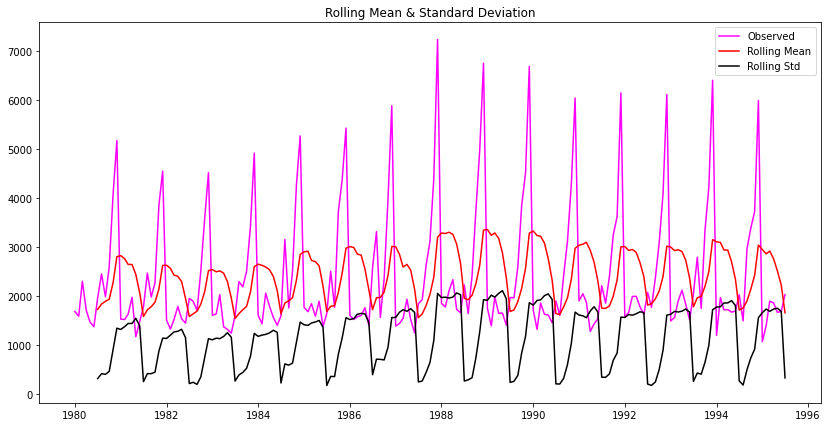

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [98]:
#Original Time Series
test_stationarity(spark['Sparkling'],'magenta')

* **We see that at 5% significant level the Time Series is non-stationary.** 
* **Let us take a difference of order 1 and check whether the Time Series is stationary or not.**
* **Difference of original series**
* **Seasonality is multiplicative as the Std deviation and mean varies according to the change in trend**

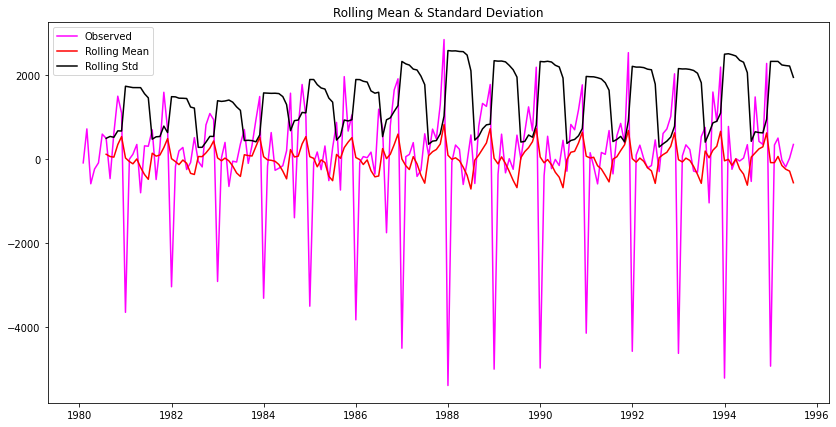

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [99]:
#Diff of order 1
test_stationarity(spark['Sparkling'].diff().dropna(),'magenta')

**We see that at $\alpha$ = 0.05 the Time Series is indeed stationary. d=1**

**If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA/SARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there.Also we can look at other kinds of transformations as part of making the time series stationary like taking logarithms.**

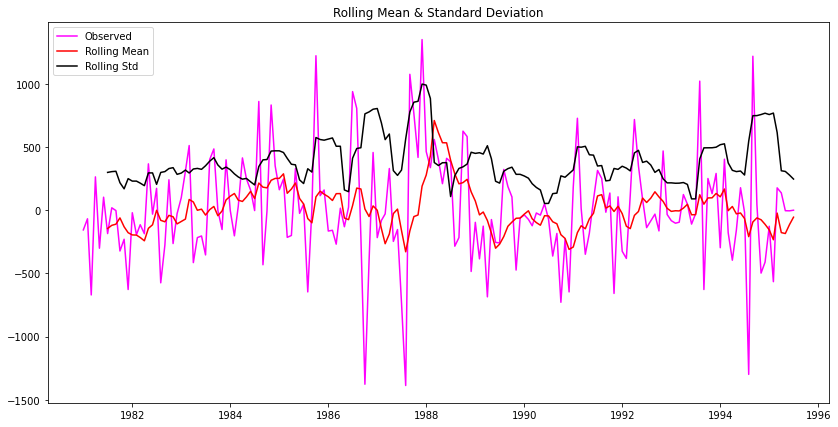

Results of Dickey-Fuller Test:
Test Statistic                  -4.460165
p-value                          0.000232
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [100]:
#check Seasonality Time Series: 
test_stationarity(spark['Sparkling'].diff(12).dropna(), 'magenta')

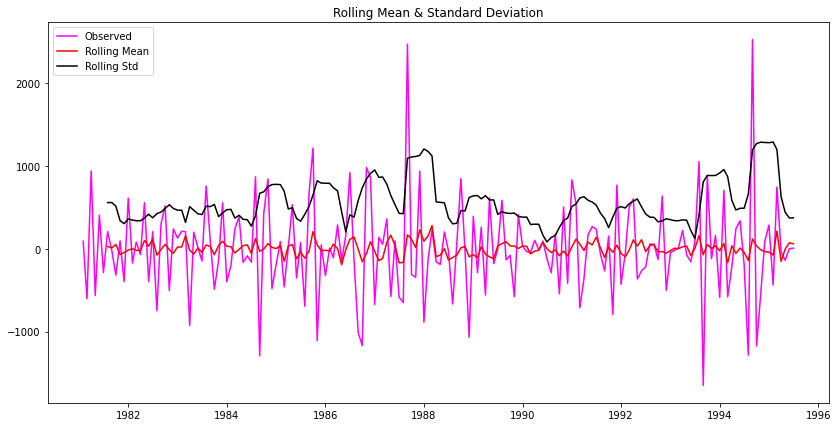

Results of Dickey-Fuller Test:
Test Statistic                  -5.113533
p-value                          0.000013
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [101]:
test_stationarity((spark['Sparkling'].diff(12).dropna()).diff().dropna(), 'magenta')

**We see that at $\alpha$ = 0.05 the Time Series is indeed stationary. But seasonality is multiplicative**

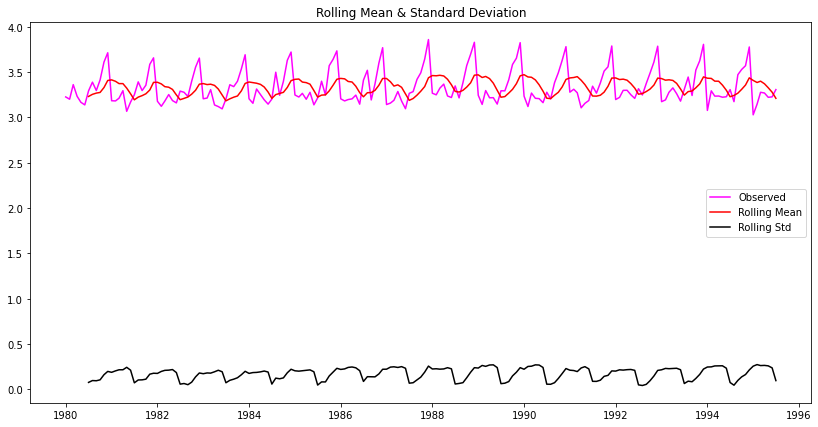

Results of Dickey-Fuller Test:
Test Statistic                  -1.749630
p-value                          0.405740
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [102]:
#Take Log series
test_stationarity(np.log10(spark['Sparkling']), 'magenta')

**Seasonality is now additive but non stationary**

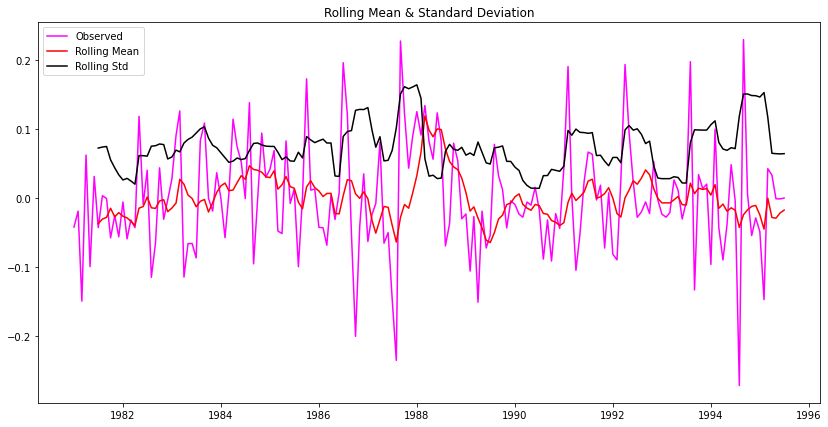

Results of Dickey-Fuller Test:
Test Statistic                  -5.183811
p-value                          0.000009
#Lags Used                      11.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64 



In [103]:
# difference of log series
test_stationarity(np.log10(spark['Sparkling']).diff(12).dropna(),  'magenta')

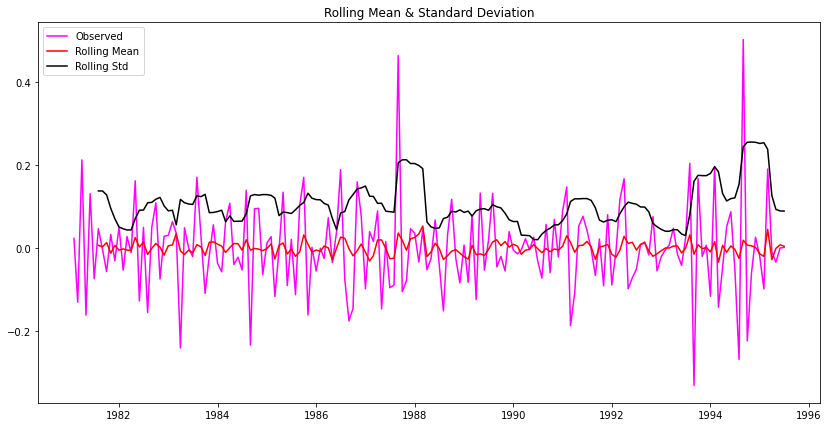

Results of Dickey-Fuller Test:
Test Statistic                  -5.254601
p-value                          0.000007
#Lags Used                      12.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64 



In [104]:
test_stationarity((np.log10(spark['Sparkling']).diff(12).dropna()).diff().dropna(),  'magenta')

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [105]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### ACF Plots

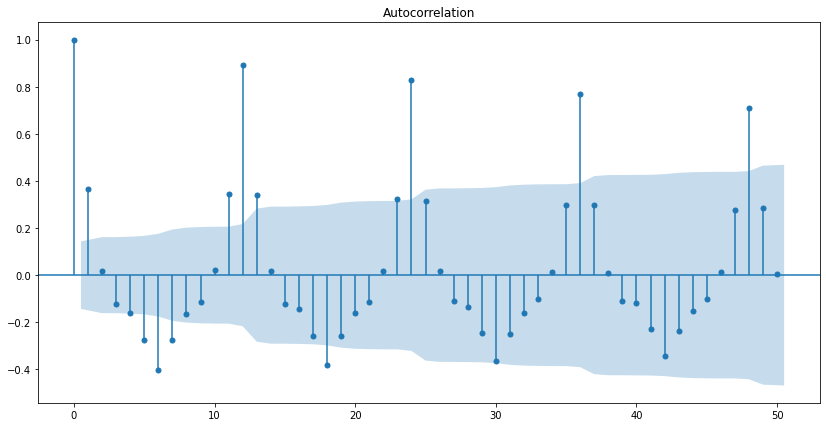

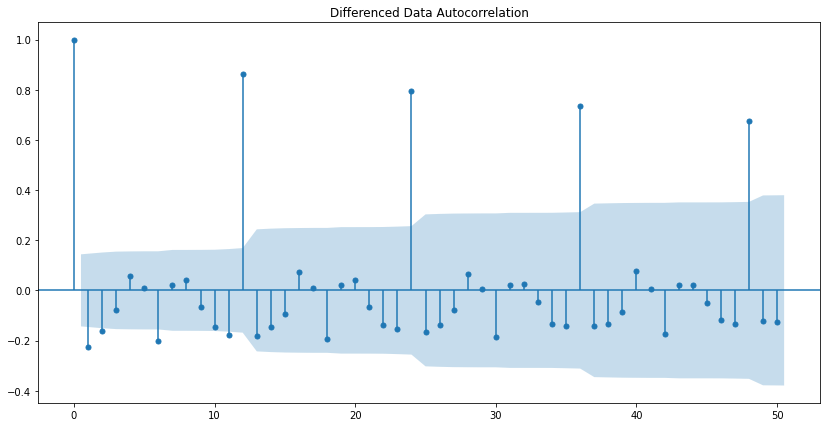

In [106]:
plot_acf(spark['Sparkling'],lags=50)
plot_acf(spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

#### PACF Plots

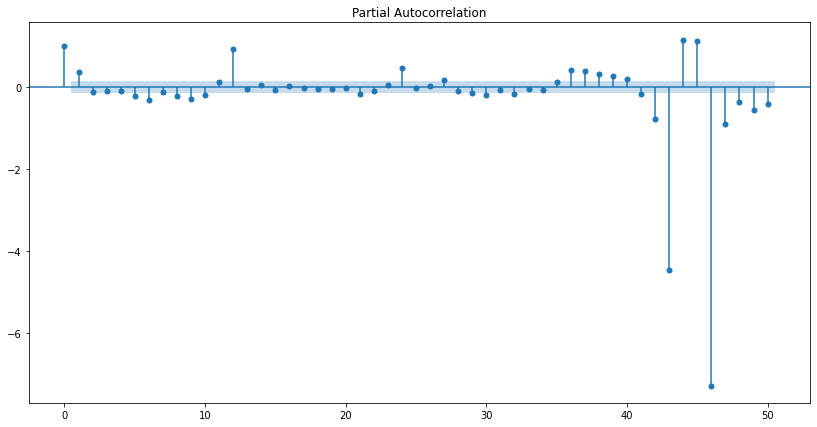

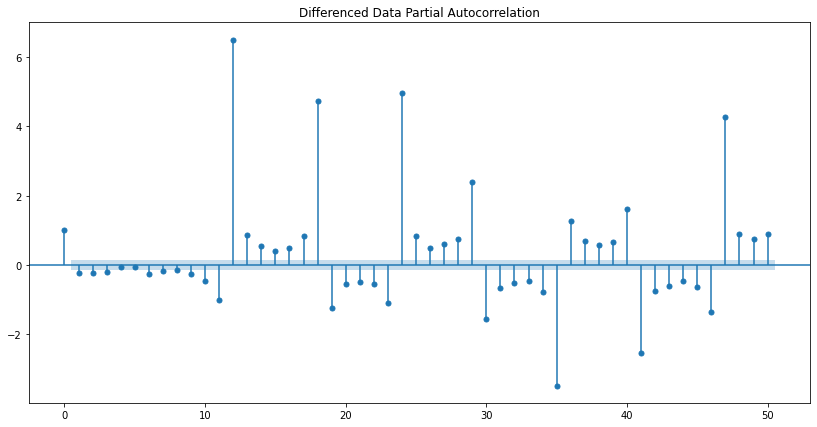

In [107]:
plot_pacf(spark['Sparkling'],lags=50)
plot_pacf(spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

**From the above plots, we can say that there seems to be a seasonality in the data.** 

## Check for stationarity of the Training Data Time Series.

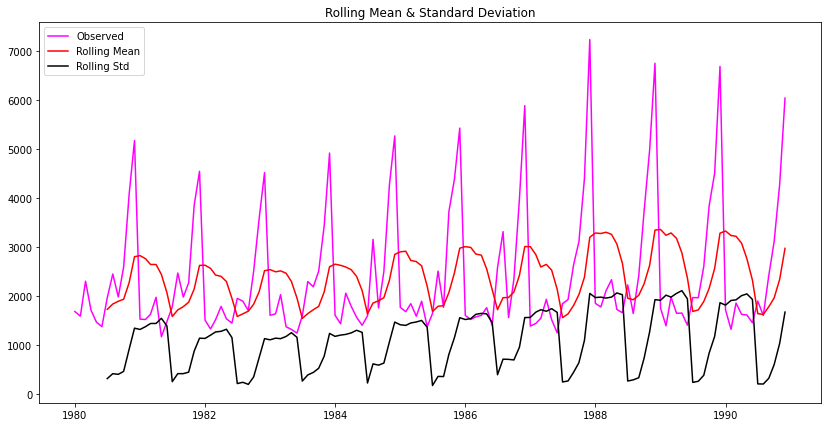

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [108]:
test_stationarity(train_spark['Sparkling'],'magenta')

* **We see that at 5% significant level the Time Series is non-stationary.** 
* **Let us take a difference of order 1 and check whether the Time Series is stationary or not.**

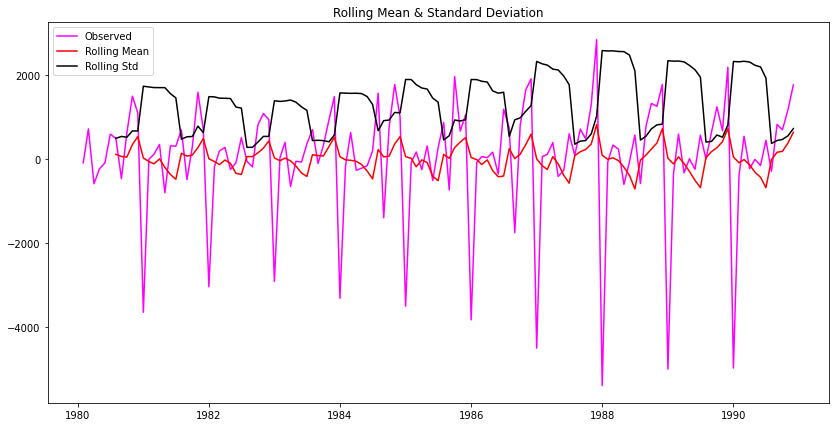

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [109]:
test_stationarity(train_spark['Sparkling'].diff().dropna(),'magenta')

**We see that at $\alpha$ = 0.05 the Time Series is indeed stationary. d=1**

# 1.6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## Model 8: Auto-ARIMA 

In [110]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [111]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [112]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_spark['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.90643899768
ARIMA(0, 1, 2) - AIC:2232.783097685749
ARIMA(1, 1, 0) - AIC:2268.5280613021696
ARIMA(1, 1, 1) - AIC:2235.013945351209
ARIMA(1, 1, 2) - AIC:2233.597647118897
ARIMA(2, 1, 0) - AIC:2262.035600260619
ARIMA(2, 1, 1) - AIC:2232.36048987896
ARIMA(2, 1, 2) - AIC:2210.6213693964587


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [113]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.621369
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906439
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [114]:
#(2, 1, 2) -> AIC = 2210.621369
auto_ARIMA = ARIMA(train_spark['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.311
Method:                       css-mle   S.D. of innovations           1013.283
Date:                Tue, 23 Feb 2021   AIC                           2210.621
Time:                        00:16:57   BIC                           2227.873
Sample:                    02-01-1980   HQIC                          2217.631
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5852      0.518     10.789      0.000       4.571       6.600
ar.L1.D.Sparkling     1.2699      0.075     17.043      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\srika\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


## Predict on the Test Set using this model and evaluate the model.

In [115]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_spark['Sparkling']))

In [116]:
rmse_arima_auto_model = metrics.mean_squared_error(test_spark['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print("For Auto-ARIMA Model forecast accuracy_score on the Test Data, RMSE is %3.3f" %(rmse_arima_auto_model))

For Auto-ARIMA Model forecast accuracy_score on the Test Data, RMSE is 1374.297


In [117]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_arima_auto_model]}
                           ,index=['Auto_ARIMA(2,1,2)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_9])
spark_resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverage                                  1275.081804
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
6 point TMA                                    1283.927428
9 point TMA                                    1346.278315
Alpha=0.0496, SES Optimized                    1316.034674
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   469.432003
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690
Auto_ARIMA(2,1,2)                              1374.297411

## Model 9: Auto-SARIMA 

In [118]:
SARIMA_train = train_spark.copy()
SARIMA_test = test_spark.copy()

**From ACF and PACF plots We can see that there is a seasonality of 12. We will run our auto SARIMA models by setting seasonality 12.**

In [119]:
import itertools
p = q = range(0,3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [120]:
SARIMA_AIC_spark = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [121]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark = SARIMA_model_spark.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark.aic))
        SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.9824851895298
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.862633467858
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.6773574254973
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.3243908187815
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.528962130752
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.5000981866663
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1455.991155366525
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.6565719828536
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.6639234230036
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:1399.1083846680492
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:1602.859481902381
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:1570.8550259196386
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:1400.6709524137561
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:1428.244881115646
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:1429.6168027962985
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:1402.63858885260

In [122]:
SARIMA_AIC_spark.sort_values(by=['AIC']).head()

param       seasonal          AIC
47  (1, 1, 2)  (0, 1, 2, 12)  1382.347780
20  (0, 1, 2)  (0, 1, 2, 12)  1382.484254
50  (1, 1, 2)  (1, 1, 2, 12)  1384.137874
74  (2, 1, 2)  (0, 1, 2, 12)  1384.317618
23  (0, 1, 2)  (1, 1, 2, 12)  1384.398867

In [123]:
# (1, 1, 2)	(0, 1, 2, 12) AIC=1382.347780
auto_SARIMA_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark = auto_SARIMA_spark.fit(maxiter=1000)
print(results_auto_SARIMA_spark.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Tue, 23 Feb 2021   AIC                           1382.348
Time:                                    00:18:55   BIC                           1397.479
Sample:                                         0   HQIC                          1388.455
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5507      0.287     -1.922      0.055      -1.112       0.011
ma.L1         -0.1612      0.235   

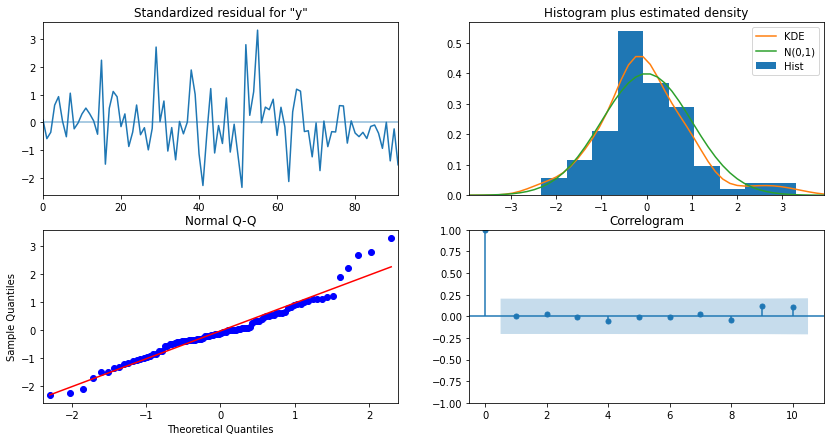

In [124]:
results_auto_SARIMA_spark.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [125]:
predicted_auto_SARIMA = results_auto_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']))

In [126]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1460.244631  412.922773     650.930867    2269.558395
1  1392.437177  429.721305     550.198896    2234.675459
2  1743.201708  430.065871     900.288090    2586.115325
3  1650.066938  433.930032     799.579703    2500.554172
4  1522.656035  434.242919     671.555554    2373.756516

In [127]:
# Extract the predicted and true values of our time series
spark_forecasted = predicted_auto_SARIMA.predicted_mean
SARIMA_test['spark_forecasted'] = predicted_auto_SARIMA.predicted_mean
SARIMA_test.head()

Sparkling  spark_forecasted
YearMonth                              
1991-01-01       1902       1460.244631
1991-02-01       2049       1392.437177
1991-03-01       1874       1743.201708
1991-04-01       1279       1650.066938
1991-05-01       1432       1522.656035

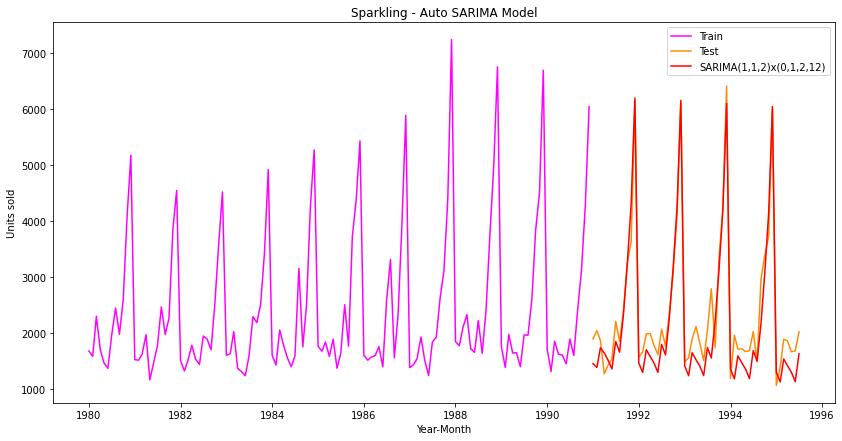

In [128]:
plt.plot(SARIMA_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(SARIMA_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_forecasted'], color='red', label='SARIMA(1,1,2)x(0,1,2,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Sparkling - Auto SARIMA Model')
plt.legend(loc='best');

In [129]:
rmse_SARIMA_auto_model = metrics.mean_squared_error(SARIMA_test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
print("For Auto-SARIMA Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SARIMA_auto_model))

For Auto-SARIMA Model forecast on the Test Data, RMSE is 382.577


In [130]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto_model]}
                           ,index=['Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_10])
spark_resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverage                                  1275.081804
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
6 point TMA                                    1283.927428
9 point TMA                                    1346.278315
Alpha=0.0496, SES Optimized                    1316.034674
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   469.432003
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690
Auto_ARIMA(2,1,2)                              1374.297411
Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)              382.576712

## Model-9B AUTO SARIMA on Log Series

In [131]:
spark_log_train = np.log10(SARIMA_train['Sparkling'])

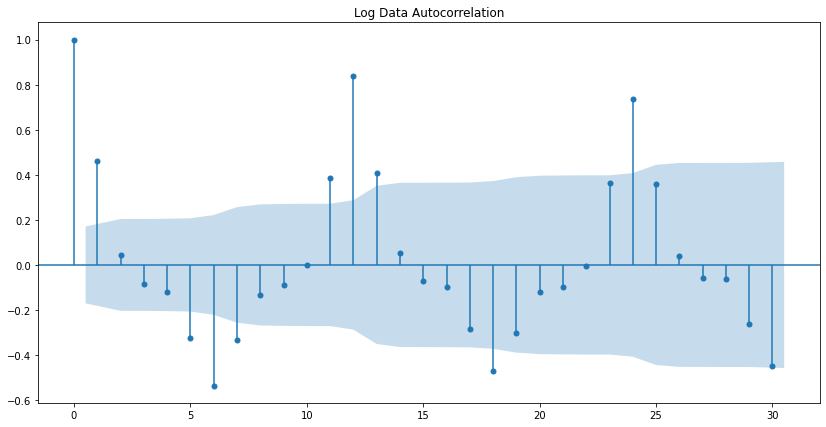

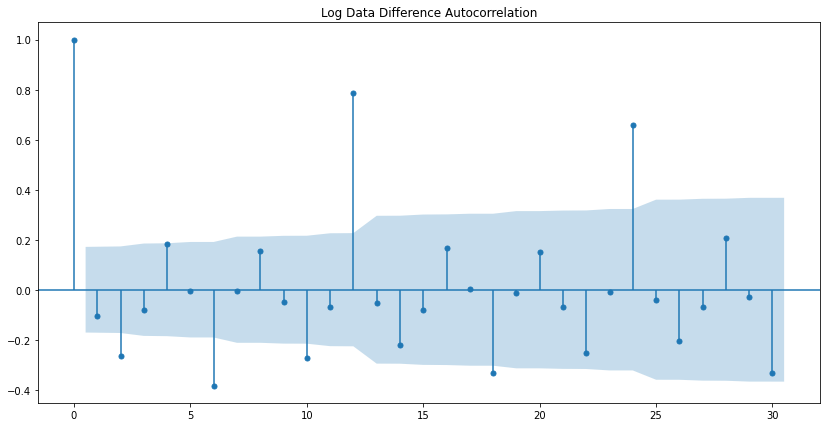

In [132]:
plot_acf(spark_log_train,lags=30,title='Log Data Autocorrelation')
plot_acf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Autocorrelation')
plt.show()

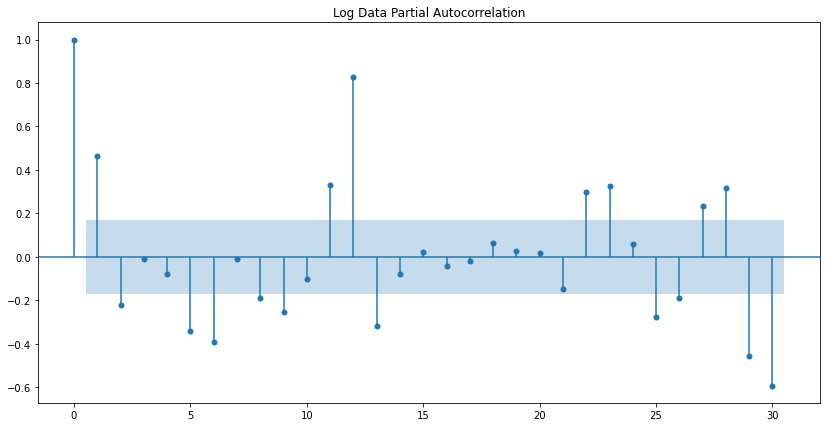

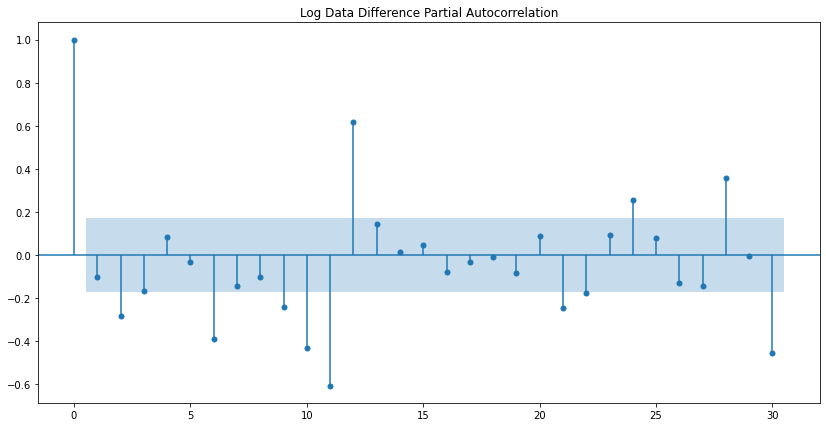

In [133]:
plot_pacf(spark_log_train,lags=30,title='Log Data Partial Autocorrelation')
plot_pacf(spark_log_train.diff().dropna(),lags=30,title='Log Data Difference Partial Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality as 12.

In [134]:
import itertools
p = q = range(0, 3) 
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [135]:
SARIMA_AIC_spark_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [136]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,#train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark_log = SARIMA_model_spark_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark_log.aic))
        SARIMA_AIC_spark_log = SARIMA_AIC_spark_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark_log.aic}, ignore_index=True)

C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\s

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:-57.223163262272415
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:-122.81829469978426
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:-137.07304219597543
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:-209.91064577905647


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:-205.21040868854698


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:-175.11378254817643
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:-217.95527734168542


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:-225.19047184295687


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:-197.4132852418688
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:-200.40913580644641


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:-196.67576097761105


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:-173.28892560212546
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:-201.1549172220066


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:-199.3058031043373


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:-198.59900311324733
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:-177.22797540098884


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:-175.23566704809932


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:-170.8727645189139
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:-57.792168936713395


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:-122.23260706338692


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:-138.43622725502303
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:-256.102941954412


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:-253.58476392852134


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:-218.55896790484826


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:-261.546878504894


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:-284.4720316054569


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:-244.4639163672754


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:-248.20817487499363


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:-247.01117673498777


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:-217.72696359144584


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:-246.50642474866916


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:-250.67711469373648


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:-245.27764518414807


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:-220.45389845814094


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:-218.54809459408673


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:-211.89408862819414
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:-87.16430408404557


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:-153.63447343234404


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:-164.7466364317508


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:-259.9213972495567


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:-249.20890405833313


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:-218.57705314453392


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:-266.2376520856935


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:-281.5679950865711


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:-239.86560451355166


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:-248.01090545422971


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:-242.4691645905875


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:-217.11584415863382


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:-247.04555372745284


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 0, 1, 12)7 - AIC:-248.95185032602734


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 0, 2, 12)7 - AIC:-241.81109878702318


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:-219.9626675097641


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:-217.980445710447
SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:-213.2405380268564
SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:-56.62659251170257


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:-122.23327148079025


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(0, 0, 2, 12)7 - AIC:-137.12305940949796
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:-224.95834507859485


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:-223.18645106505247


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:-189.47871127794892
SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:-228.63007911560334

C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:-249.99948140239394


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 0, 2, 12)7 - AIC:-214.30021608531018


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:-213.8626327140646


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:-216.4848154059562


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:-188.4334390534856


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 0, 0, 12)7 - AIC:-213.3689352624604


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 0, 1, 12)7 - AIC:-214.3426164563183


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 0, 2, 12)7 - AIC:-215.1013846200369
SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:-189.15129920211854


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:-187.38243015100127


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:-185.46983508439166


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:-85.03639777158992


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:-149.5459038275831


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 0, 2, 12)7 - AIC:-162.4093428686937


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:-259.55710810033094


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:-252.28291663452387


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:-217.36137867685753


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:-262.8378506424635


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:-282.51733542758586


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 0, 2, 12)7 - AIC:-242.95737416976655


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:-245.28012055466425


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:-245.47598978951018


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:-216.42210454014204


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 0, 0, 12)7 - AIC:-243.3531337895696


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 0, 1, 12)7 - AIC:-245.33002303154655


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 0, 2, 12)7 - AIC:-243.80122600054057


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:-217.2388174393933


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:-215.26243406634362


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:-210.76635754947588


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 0, 0, 12)7 - AIC:-87.2903131740328


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 0, 1, 12)7 - AIC:-152.23666243475455


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 0, 2, 12)7 - AIC:-162.9956420539398


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:-257.9507020460556


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:-248.10669994270182


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:-217.8361544052699


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 0, 0, 12)7 - AIC:-263.87479261730533


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 0, 1, 12)7 - AIC:-279.6116666631177


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 0, 2, 12)7 - AIC:-241.40198616706567
SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:-244.06388368767523


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:-242.33302952469404


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:-216.13566466287094


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 0, 0, 12)7 - AIC:-242.37332551470072


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 0, 1, 12)7 - AIC:-246.0151962929105
SARIMA(1, 1, 2)x(2, 0, 2, 12)7 - AIC:-240.85867629704393


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:-216.27722367278477


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:-214.39030691018155


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:-212.14297989852187
SARIMA(2, 1, 0)x(0, 0, 0, 12)7 - AIC:-64.48764897324475


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(0, 0, 1, 12)7 - AIC:-132.59657556859443


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(0, 0, 2, 12)7 - AIC:-146.20195916696917
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:-232.98423245631076


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:-235.6404648892728


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:-200.49406035561418


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 0, 0, 12)7 - AIC:-235.3092527773724


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 0, 1, 12)7 - AIC:-260.82997640290904


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 0, 2, 12)7 - AIC:-225.6362936522652


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:-222.18308423992565


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:-225.26416928836363


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:-199.4669430492989


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 0, 0, 12)7 - AIC:-220.7697089657361


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 0, 1, 12)7 - AIC:-223.2302686342132


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 0, 2, 12)7 - AIC:-224.34361782628784


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:-198.80917323134688


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:-196.83111515726293


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:-194.94138830994063


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 0, 0, 12)7 - AIC:-88.27946164907347


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 0, 1, 12)7 - AIC:-154.38039805163825


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:-166.23127843213234


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:-257.7015034305768


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:-250.3725476286254


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:-215.4664448492373
SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:-257.7908747561213


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:-278.28822700534886


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:-241.07884726837798


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:-240.350914182791


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:-243.47779347227865


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:-214.68152066009577


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:-238.9595313162033


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:-240.20045414627617


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:-242.05114554667853


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:-212.29556784104975


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:-210.3340731097352


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:-208.79632885031046


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:-96.13368008375821


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:-150.71504698267216


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 0, 2, 12)7 - AIC:-161.94168152095403


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:-258.6037395380582


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:-246.59665897464788


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:-215.89805734705254


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 0, 0, 12)7 - AIC:-261.3087468584384


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:-277.8803048139613


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:-239.40945159843454


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:-239.33411898205878


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:-240.34985360493735


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:-214.22803646360214


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:-236.95660675552472


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:-241.6535934876814


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:-238.1020538976087


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:-211.4584971678892


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:-209.49383030750863


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:-210.1488822337188


In [137]:
SARIMA_AIC_spark_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
25   (0, 1, 1)  (1, 0, 1, 12) -284.472032
79   (1, 1, 1)  (1, 0, 1, 12) -282.517335
43   (0, 1, 2)  (1, 0, 1, 12) -281.567995
97   (1, 1, 2)  (1, 0, 1, 12) -279.611667
133  (2, 1, 1)  (1, 0, 1, 12) -278.288227

In [138]:
#(0, 1, 1)*(1, 0, 1, 12) AIC-284.472032
import statsmodels.api as sm

auto_SARIMA_spark_log = sm.tsa.statespace.SARIMAX(spark_log_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark_log = auto_SARIMA_spark_log.fit(maxiter=1000)
print(results_auto_SARIMA_spark_log.summary())

C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 146.236
Date:                            Tue, 23 Feb 2021   AIC                           -284.472
Time:                                    00:22:28   BIC                           -273.423
Sample:                                01-01-1980   HQIC                          -279.986
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8966      0.045    -19.863      0.000      -0.985      -0.808
ar.S.L12       1.0112      0.020   

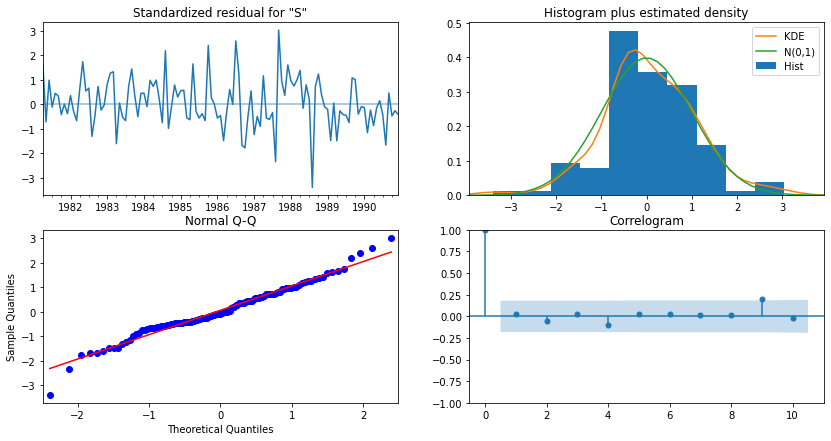

In [139]:
results_auto_SARIMA_spark_log.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [140]:
predicted_auto_SARIMA_spark_log = results_auto_SARIMA_spark_log.get_forecast(steps=len(SARIMA_test['Sparkling']))

In [141]:
predicted_auto_SARIMA_spark_log.summary_frame(alpha=0.05).head()

Sparkling       mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  3.212032  0.067108       3.080503       3.343561
1991-02-01  3.141308  0.067465       3.009079       3.273536
1991-03-01  3.256286  0.067820       3.123361       3.389212
1991-04-01  3.226732  0.068174       3.093113       3.360352
1991-05-01  3.195788  0.068526       3.061479       3.330098

In [142]:
# Extract the predicted and true values of our time series
spark_forecasted_log = predicted_auto_SARIMA_spark_log.predicted_mean
SARIMA_test['spark_forecasted_log'] = np.power(10, predicted_auto_SARIMA_spark_log.predicted_mean)
SARIMA_test.head()

Sparkling  spark_forecasted  spark_forecasted_log
YearMonth                                                    
1991-01-01       1902       1460.244631           1629.416485
1991-02-01       2049       1392.437177           1384.547008
1991-03-01       1874       1743.201708           1804.206479
1991-04-01       1279       1650.066938           1685.514276
1991-05-01       1432       1522.656035           1569.597811

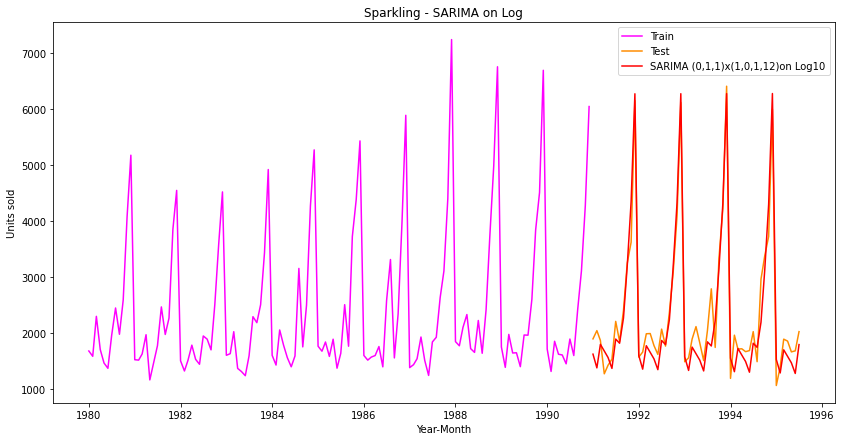

In [143]:
plt.plot(SARIMA_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(SARIMA_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['spark_forecasted_log'], color='red', label='SARIMA (0,1,1)x(1,0,1,12)on Log10')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - SARIMA on Log')
plt.legend(loc='best');

In [144]:
rmse_SARIMA_auto_model_log = metrics.mean_squared_error(SARIMA_test['Sparkling'],SARIMA_test['spark_forecasted_log'],squared=False)
print("For Auto-SARIMA_log Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SARIMA_auto_model_log))

For Auto-SARIMA_log Model forecast on the Test Data, RMSE is 336.800


In [145]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto_model_log]}
                           ,index=['Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_11])
spark_resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverage                                  1275.081804
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
6 point TMA                                    1283.927428
9 point TMA                                    1346.278315
Alpha=0.0496, SES Optimized                    1316.034674
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   469.432003
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690
Auto_ARIMA(2,1,2)                              1374.297411
Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)              382.576712
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)          336.800144

# 1.7 Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## Model-10 Manual ARIMA 

**Look at the ACF and the PACF plots once more.**

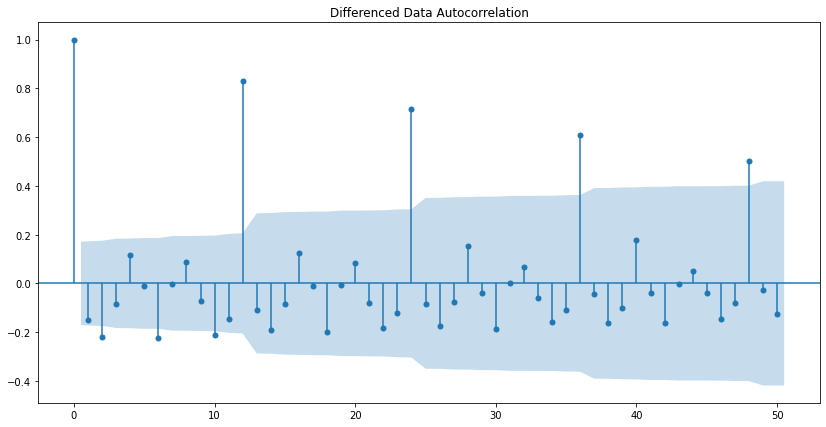

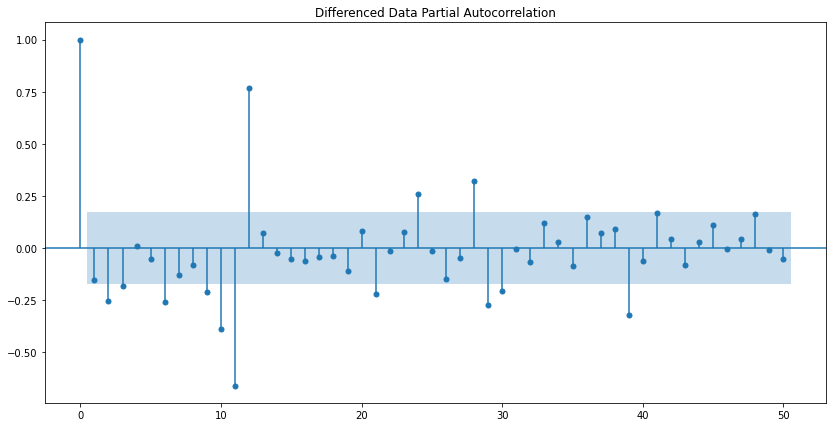

In [146]:
plot_acf(train_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

**Here, we have taken alpha=0.05.**

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

**By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.**

**We get a comparatively simpler model by looking at the ACF and the PACF plots.**

**Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error.**

In [147]:
manual_ARIMA = ARIMA(train_spark['Sparkling'].astype('float64'), order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.791
Method:                           css   S.D. of innovations           1377.911
Date:                Tue, 23 Feb 2021   AIC                           2269.583
Time:                        00:22:31   BIC                           2275.333
Sample:                    02-01-1980   HQIC                          2271.919
                         - 12-01-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2901    120.389      0.277      0.782    -202.667     269.248


C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\srika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


## Predict on the Test Set using this model and evaluate the model.

In [148]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_spark['Sparkling']))

In [149]:
rmse_arima_manual_model = metrics.mean_squared_error(test_spark['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print("For Manual-ARIMA Model forecast on the Test Data, RMSE is %3.3f" %(rmse_arima_manual_model))

For Manual-ARIMA Model forecast on the Test Data, RMSE is 4779.154


**The data has some seasonality so we should build a SARIMA model to get better accuracy.**

In [150]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [rmse_arima_manual_model]}
                           ,index=['Manual_ARIMA(0,1,0)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_12])
spark_resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverage                                  1275.081804
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
6 point TMA                                    1283.927428
9 point TMA                                    1346.278315
Alpha=0.0496, SES Optimized                    1316.034674
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   469.432003
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690
Auto_ARIMA(2,1,2)                              1374.297411
Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)              382.576712
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)          336.800144
Manual_ARIMA(0,1,0)                            4779.154299

## Model-11A Manual SARIMA 

**Look at the ACF and the PACF plots once more.**

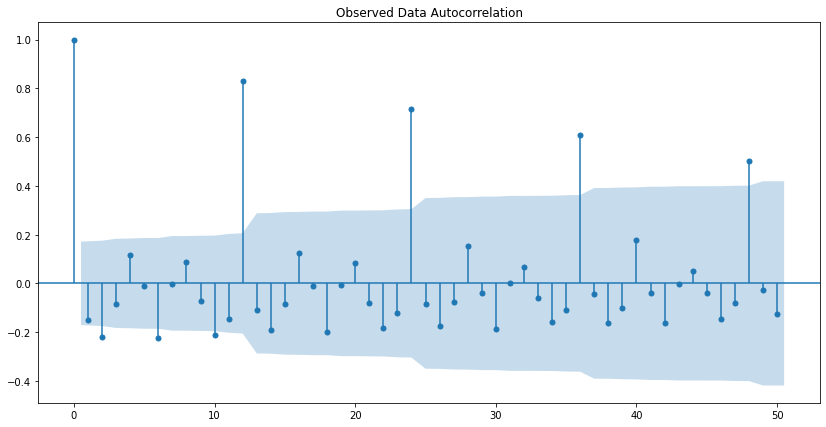

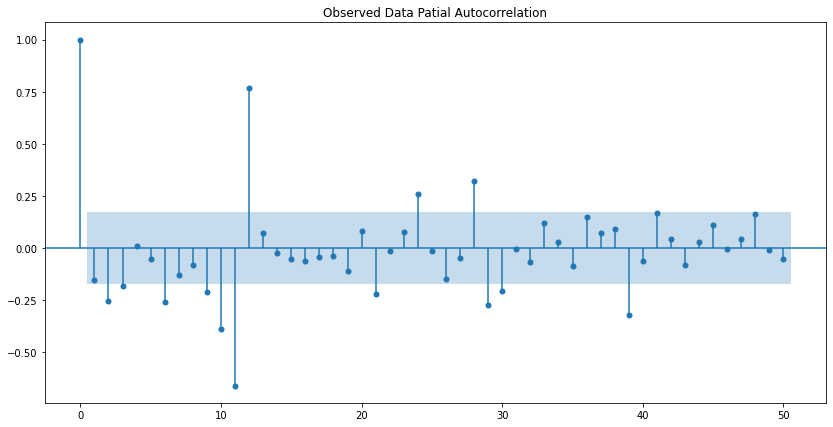

In [151]:
plot_acf(SARIMA_train['Sparkling'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(SARIMA_train['Sparkling'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

**We see that our ACF plot at the seasonal interval (12) does not taper off quickly. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.**

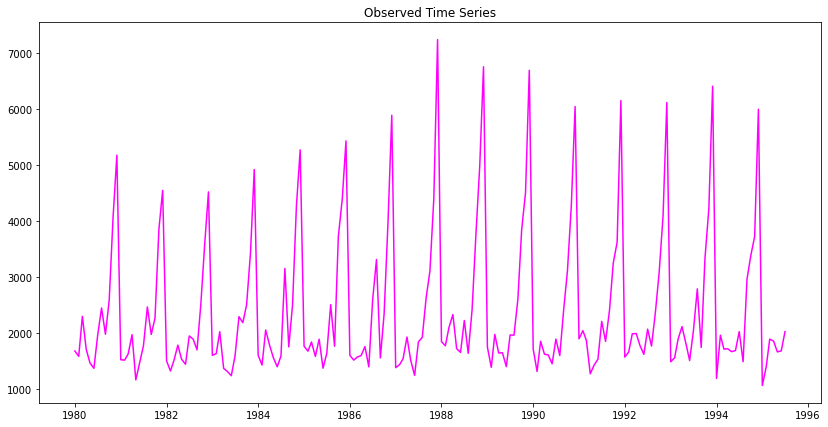

In [152]:
plt.plot(spark['Sparkling'], color = 'magenta')
plt.title ('Observed Time Series');

**We see that there is marginal trend and but have significant seasonality. So, now we take a seasonal differencing and check the series.**

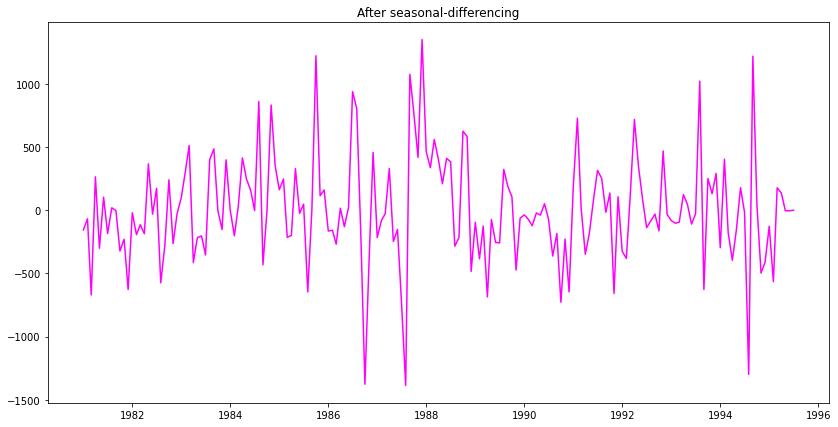

In [153]:
plt.plot(spark['Sparkling'].diff(12).dropna(), color = 'magenta')
plt.title ('After seasonal-differencing');

**The marginal trend in the data is still seen**

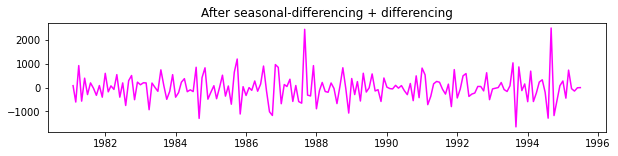

In [154]:
plt.figure(figsize=(10,2))
plt.plot((spark['Sparkling'].diff(12).dropna()).diff().dropna(),  color = 'magenta')
plt.title ('After seasonal-differencing + differencing');

**Now we see that there is almost no trend present in the data. Seasonality is only present in the data.**

**Check the stationarity of the above series before fitting the SARIMA model.**

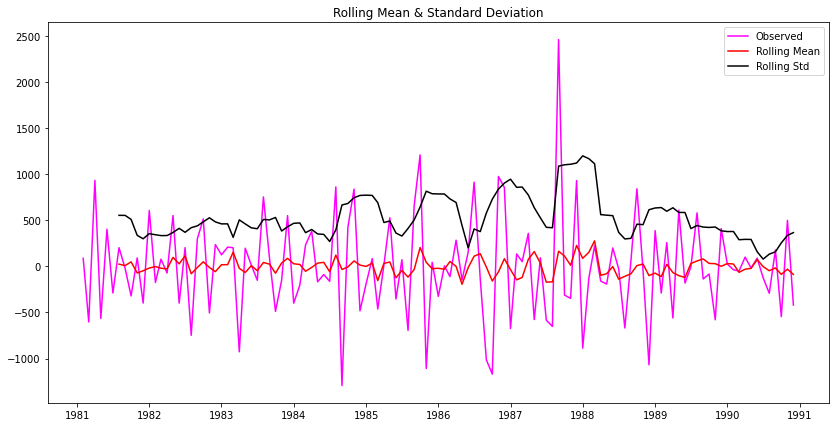

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [155]:
test_stationarity((SARIMA_train['Sparkling'].diff(12).dropna()).diff().dropna(), 'magenta')

**Checking the ACF and the PACF plots for the new modified Time Series.**

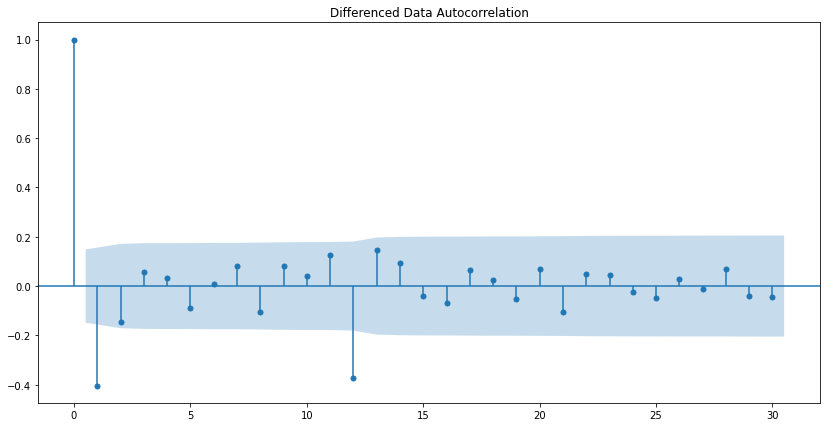

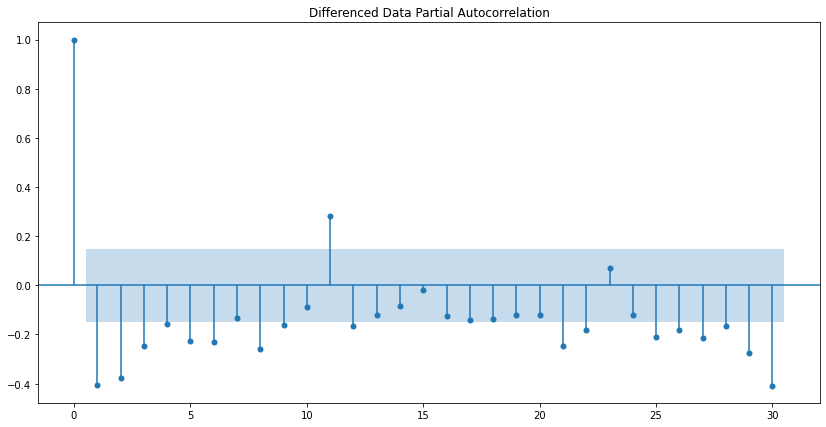

In [156]:
plot_acf((spark['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Autocorrelation')
plot_pacf((spark['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Partial Autocorrelation');

In [157]:
#(3,1,1)*(1,1,2,12)
import statsmodels.api as sm

manual_SARIMA_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark = manual_SARIMA_spark.fit(maxiter=1000)
print(results_manual_SARIMA_spark.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -693.697
Date:                                 Tue, 23 Feb 2021   AIC                           1403.394
Time:                                         00:22:37   BIC                           1423.654
Sample:                                              0   HQIC                          1411.574
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.130      1.713      0.087      -0.032       0

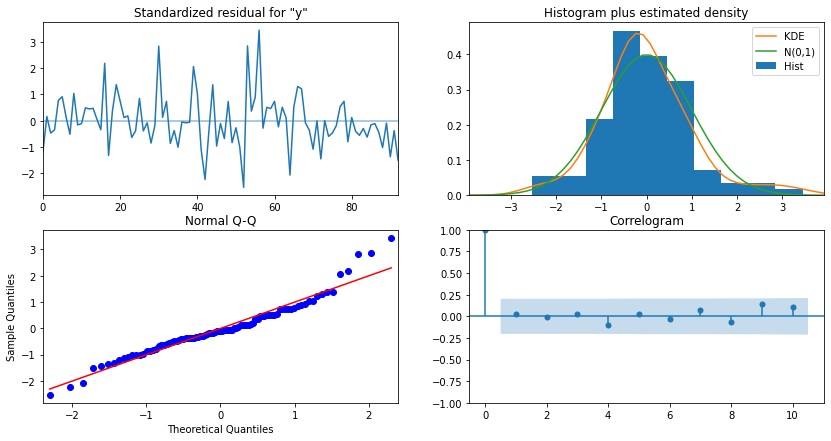

In [158]:
results_manual_SARIMA_spark.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [159]:
predicted_manual_SARIMA = results_manual_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']))

In [160]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1579.910093  416.594366     763.400141    2396.420046
1  1419.154320  429.113722     578.106879    2260.201762
2  1868.143938  429.104364    1027.114840    2709.173037
3  1731.472337  430.973041     886.780698    2576.163976
4  1659.822745  431.906023     813.302496    2506.342994

In [161]:
# Extract the predicted and true values of our time series
manual_spark_forecasted = predicted_manual_SARIMA.predicted_mean
SARIMA_test['manual_spark_forecasted'] = predicted_manual_SARIMA.predicted_mean
SARIMA_test.head()

Sparkling  spark_forecasted  spark_forecasted_log  \
YearMonth                                                       
1991-01-01       1902       1460.244631           1629.416485   
1991-02-01       2049       1392.437177           1384.547008   
1991-03-01       1874       1743.201708           1804.206479   
1991-04-01       1279       1650.066938           1685.514276   
1991-05-01       1432       1522.656035           1569.597811   

            manual_spark_forecasted  
YearMonth                            
1991-01-01              1579.910093  
1991-02-01              1419.154320  
1991-03-01              1868.143938  
1991-04-01              1731.472337  
1991-05-01              1659.822745

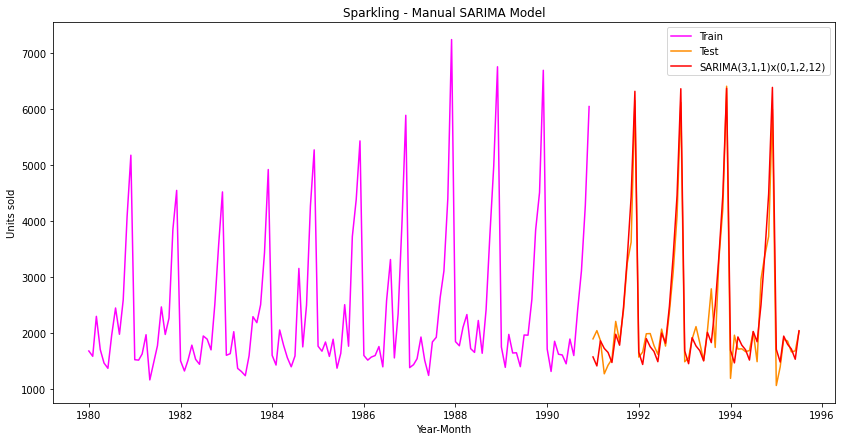

In [162]:
plt.plot(SARIMA_train['Sparkling'], label='Train', color = 'magenta')
plt.plot(SARIMA_test['Sparkling'], label='Test', color = 'darkorange')

plt.plot(SARIMA_test['manual_spark_forecasted'], color='red', label='SARIMA(3,1,1)x(0,1,2,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Sparkling - Manual SARIMA Model')
plt.legend(loc='best');

In [163]:
rmse_SARIMA_manual_model = metrics.mean_squared_error(SARIMA_test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
print("For Manual-SARIMA Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SARIMA_manual_model))

For Manual-SARIMA Model forecast on the Test Data, RMSE is 324.107


In [164]:
resultsDf_13 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_manual_model]}
                           ,index=['Manual_SARIMA#(3,1,1)*(1,1,2,12)'])

spark_resultsDf = pd.concat([spark_resultsDf, resultsDf_13])
spark_resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverage                                  1275.081804
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
6 point TMA                                    1283.927428
9 point TMA                                    1346.278315
Alpha=0.0496, SES Optimized                    1316.034674
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   469.432003
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690
Auto_ARIMA(2,1,2)                              1374.297411
Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)              382.576712
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)          336.800144
Manual_ARIMA(0,1,0)                            4779.154299
Manual_SARIMA#(3,1,1)*(1,1,2,12)                324.106824

# 1.8	Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [165]:
spark_resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverage                                  1275.081804
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
6 point TMA                                    1283.927428
9 point TMA                                    1346.278315
Alpha=0.0496, SES Optimized                    1316.034674
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   469.432003
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690
Auto_ARIMA(2,1,2)                              1374.297411
Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)              382.576712
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)          336.800144
Manual_ARIMA(0,1,0)                            4779.154299
Manual_SARIMA#(3,1,1)*(1,1,2,12)                324.106824

# 1.9	Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [166]:
spark_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Manual_SARIMA#(3,1,1)*(1,1,2,12)                324.106824
Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)          336.800144
Alpha=0.4,Beta=0.1,gamma=0.3,TES iterative      371.367690
Auto_SARIMA(1, 1, 2)*(0, 1, 2, 12)              382.576712
Alpha=0.11,Beta=0.7,gamma=0.395 TES Optimized   469.432003
2 point TMA                                     813.400684
4 point TMA                                    1156.589694
SimpleAverage                                  1275.081804
6 point TMA                                    1283.927428
Alpha=0.025,SES iterative                      1286.248846
Alpha=0.0496, SES Optimized                    1316.034674
9 point TMA                                    1346.278315
Auto_ARIMA(2,1,2)                              1374.297411
RegressionOnTime                               1389.135175
Alpha=0.1,Beta=0.1,DES iterative               1778.560000
Alpha=0.68,Beta=0.0, DES Optimized             2007.238526
NaiveModel                                     3864.279352
Manual_ARIMA(0,1,0)                            4779.154299

## Build model on the entire dataset using best optimum model:
**which is Manual_SARIMA(3,1,1)*(1,1,2,12) or Auto_SARIMA_log(0, 1, 1)*(1, 0, 1, 12)**

# Building a Manual_SARIMA  on the entire dataset

In [167]:
manual_SARIMA_spark_Full = sm.tsa.statespace.SARIMAX(spark['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark_Full = manual_SARIMA_spark_Full.fit(maxiter=1000)
print(results_manual_SARIMA_spark_Full.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  187
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1094.342
Date:                                 Tue, 23 Feb 2021   AIC                           2204.685
Time:                                         00:22:43   BIC                           2228.662
Sample:                                              0   HQIC                          2214.427
                                                 - 187                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1159      0.086      1.349      0.177      -0.052       0

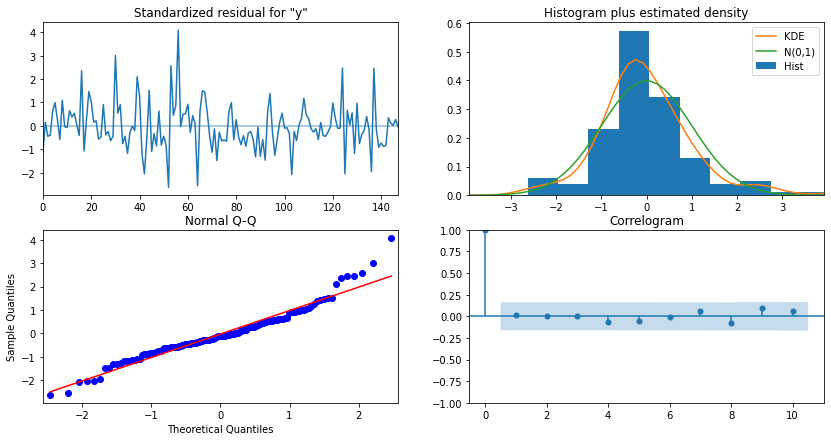

In [168]:
results_manual_SARIMA_spark_Full.plot_diagnostics()
plt.show()

## Forecast for the next 12 months using this model.

In [169]:
Forecast_manual_SARIMA = results_manual_SARIMA_spark_Full.get_forecast(steps=12)

In [170]:
rmse_spark_Full = metrics.mean_squared_error(spark['Sparkling'],results_manual_SARIMA_spark_Full.fittedvalues,squared=False)
print("For Manual-SARIMA Model forecast on the Entire Data, RMSE is %3.3f" %(rmse_spark_Full))

For Manual-SARIMA Model forecast on the Entire Data, RMSE is 547.591


In [171]:
Forecast_manual_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1870.888610  390.915176    1104.708943    2637.068277
1  2489.623600  395.293828    1714.861934    3264.385266
2  3299.650019  395.322855    2524.831460    4074.468578
3  3934.056643  396.282345    3157.357519    4710.755767
4  6135.396048  396.768693    5357.743700    6913.048396

In [172]:
Forecast_manual_SARIMA_date = Forecast_manual_SARIMA.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

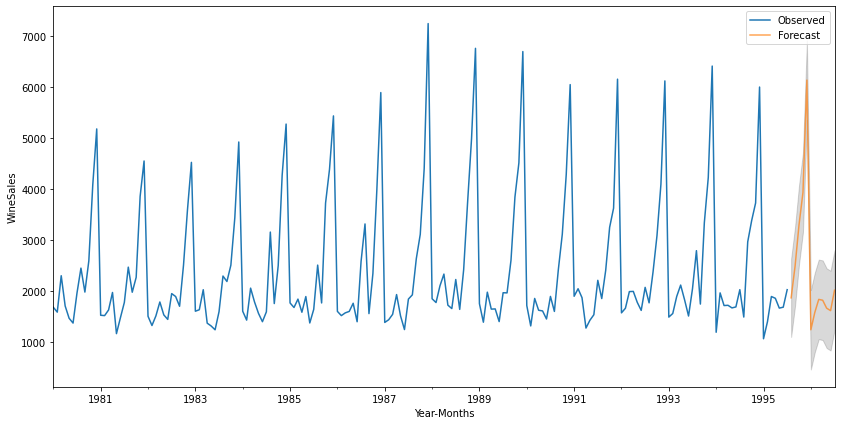

In [173]:
# plot the forecast along with the confidence band

axis = spark['Sparkling'].plot(label='Observed')
Forecast_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(Forecast_manual_SARIMA_date.index, Forecast_manual_SARIMA_date['mean_ci_lower'], 
                  Forecast_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('WineSales')
plt.legend(loc='best')
plt.show()

# 1.10	 Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

In [174]:
Forecast_manual_SARIMA_date['mean'].sum()

29534.25245872199

In [175]:
Forecast_manual_SARIMA_date['mean'].describe()

count      12.000000
mean     2461.187705
std      1391.118211
min      1245.727222
25%      1656.647701
50%      1855.796939
75%      2692.130205
max      6135.396048
Name: mean, dtype: float64

In [176]:
Forecast_manual_SARIMA_date['mean']

1995-08-31    1870.888610
1995-09-30    2489.623600
1995-10-31    3299.650019
1995-11-30    3934.056643
1995-12-31    6135.396048
1996-01-31    1245.727222
1996-02-29    1584.643764
1996-03-31    1840.705268
1996-04-30    1823.847833
1996-05-31    1668.706106
1996-06-30    1620.472487
1996-07-31    2020.534859
Freq: M, Name: mean, dtype: float64

* **The model forecasts sale of 29535 units of Sparkling wine in 12 months into future. Which is an average sale of 2462 units per month.**
* **The seasonal sale in December 1995 will hit a maximum of 6136 units, before it drops to the lowest sale in January 1996; at 1246 units.**
* **The wine company is recommended to ramp up their procurement and production line in accordance with the above forecasts for the third quarter of 1995 (October, November and December), which is a total of 13,370 units of sparkling wine is expected to be sold.**
* **The forecast also indicates that the year-on-year sale of sparkling wine is not showing an upward trend. The winery must adopt innovative marketing skills to improve the sale compared to previous years.**

# END